<a href="https://colab.research.google.com/github/mariaob1201/NFT_rarity_score/blob/main/soilhealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Access to google
import pandas as pd
import numpy as np

import statsmodels.api as sm
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


In [5]:
path_sources = '/content/drive/Shareddrives/DS Projects/Erin Silva - Soil health/FromErin/'

## Soil Data

In [48]:
import pandas as pd

# Replace 'your_file.xlsx' with the actual path to your file
df_yielddta = pd.read_excel(path_sources+'interseeding_master.xlsx', sheet_name='yield_data')
df_yielddta.head(5)

,siteID,name,longitude,latitude,year,plot,trt,treatment,row_spacing,harvest,...,cp,adf_cp,ndf_cp,NDFD48,nfc,starch,milk ton (lbs/tDM),grain yield (bu/ac) at 15% moisture,cover_crop_dry_matter_biomass (lbs/ac),weed_dry_matter_biomass (lbs/ac)
0,A,Boerst,-88.937748,44.464710,2021,2,control,control,"30""",silage,...,na,na,na,na,na,na,na,na,na,na
1,A,Boerst,-88.937748,44.464710,2021,2,control,control,"60""",silage,...,na,na,na,na,na,na,na,na,na,na
2,A,Boerst,-88.937748,44.464710,2021,1,othermix,interseeding,"30""",silage,...,na,na,na,na,na,na,na,na,na,na
3,A,Boerst,-88.937748,44.464710,2021,3,othermix,interseeding,"60""",silage,...,na,na,na,na,na,na,na,na,na,na
4,B,CFFD,-87.938084,43.446201,2022,NaN,control,control,"30""",grain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.6,NaN,NaN


In [71]:
df_yielddta.groupby('row_spacing')['siteID'].count()

row_spacing
30"     218
60"      72
twin     39
Name: siteID, dtype: int64

In [92]:
df_soildta = pd.read_excel(path_sources+'interseeding_master.xlsx', sheet_name='soil_data')
df_soildta = df_soildta.rename(columns={'roW spacing':'row_spacing'})
df_soildta

,siteID,name,year,plot,trt,treatment,row_spacing,time,date,ph,sikora,p,k,Organic Matter (%),no3-n,nh4-n,tn,tc,POX-C (ppm)
0,A,Boerst,2021,NaN,othermix,interseeding,NaN,Spring,2021-06-28,7.09,NaN,18.896,53.5,2.338276,9.4,2.2,0.10,1.16,NaN
1,A,Boerst,2021,NaN,control,control,NaN,Spring,2021-06-28,6.57,NaN,20.244,51.6,2.408424,24.4,2.4,0.10,1.21,NaN
2,A,Boerst,2021,NaN,othermix,interseeding,"30""",Fall,NaT,6.75,NaN,28.332,54.3,1.862469,4.8,3.0,0.13,1.31,NaN
3,A,Boerst,2021,NaN,control,control,"30""",Fall,NaT,6.84,NaN,26.647,55.1,1.667846,8.6,3.0,0.12,1.24,NaN
4,A,Boerst,2021,NaN,othermix,interseeding,"60""",NaN,NaT,7.10,NaN,24.625,56.6,1.716713,4.9,3.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,X,Weiss,2022,NaN,control,control,"30""",Spring,NaT,6.80,NaN,35.000,110.0,4.400000,NaN,NaN,NaN,NaN,1045.80
255,X,Weiss,2022,Weiss_1,control,control,"30""",Fall,2022-10-21,6.80,NaN,26.000,137.0,4.300000,NaN,NaN,0.23,2.79,681.05
256,X,Weiss,2022,Weiss_2,own_mix,interseeding,"30""",Fall,2022-10-21,6.70,NaN,27.000,119.0,4.600000,NaN,NaN,0.24,2.90,908.15
257,Y,Winker,2021,NaN,NaN,NaN,"30""",Spring,2021-06-30,7.53,NaN,22.940,96.7,2.448170,15.1,3.8,0.13,1.64,NaN


In [70]:
df_soildta.groupby('row_spacing')['siteID'].count()

row_spacing
30"     164
60"      55
tWin      5
Name: siteID, dtype: int64

In [93]:
mergeddf = df_soildta.merge(df_yielddta, how='left', on=['name','treatment','year','row_spacing'])
# Drop duplicate rows, if any
mergeddf = mergeddf.drop_duplicates()

# Get the length of the merged DataFrame
len(mergeddf)

1026

In [94]:
len(df_soildta)

259

In [95]:
# Group by 'siteID' and check for duplicate measurements of 'p', 'ph', and 'Organic Matter (%)'
duplicate_criteria = ['name','treatment','year','row_spacing', 'p', 'ph','k', 'Organic Matter (%)']
filtered_df = mergeddf.drop_duplicates(subset=duplicate_criteria, keep="first")

# Display the resulting DataFrame
len(filtered_df)


259

In [96]:
filtered_df

,siteID_x,name,year,plot_x,trt_x,treatment,row_spacing,time,date,ph,...,cp,adf_cp,ndf_cp,NDFD48,nfc,starch,milk ton (lbs/tDM),grain yield (bu/ac) at 15% moisture,cover_crop_dry_matter_biomass (lbs/ac),weed_dry_matter_biomass (lbs/ac)
0,A,Boerst,2021,NaN,othermix,interseeding,NaN,Spring,2021-06-28,7.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,Boerst,2021,NaN,control,control,NaN,Spring,2021-06-28,6.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,Boerst,2021,NaN,othermix,interseeding,"30""",Fall,NaT,6.75,...,na,na,na,na,na,na,na,na,na,na
3,A,Boerst,2021,NaN,control,control,"30""",Fall,NaT,6.84,...,na,na,na,na,na,na,na,na,na,na
4,A,Boerst,2021,NaN,othermix,interseeding,"60""",NaN,NaT,7.10,...,na,na,na,na,na,na,na,na,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,X,Weiss,2022,NaN,control,control,"30""",Spring,NaT,6.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,X,Weiss,2022,Weiss_1,control,control,"30""",Fall,2022-10-21,6.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1023,X,Weiss,2022,Weiss_2,own_mix,interseeding,"30""",Fall,2022-10-21,6.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,708.82,NaN
1024,Y,Winker,2021,NaN,NaN,NaN,"30""",Spring,2021-06-30,7.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
sitestoexclude = []
for siteid in set(filtered_df["siteID_x"].values):
  cases = filtered_df[filtered_df["siteID_x"]==siteid]
  if 'control' not in set(cases["treatment"].values):
    print(f"Here there are no control, exclude {siteid}")
    sitestoexclude.append(siteid)

Here there are no control, exclude C
Here there are no control, exclude T
Here there are no control, exclude D
Here there are no control, exclude J
Here there are no control, exclude V
Here there are no control, exclude Q
Here there are no control, exclude Y


In [102]:
filtered_df[filtered_df["siteID_x"].isin(sitestoexclude)]

,siteID_x,name,year,plot_x,trt_x,treatment,row_spacing,time,date,ph,...,cp,adf_cp,ndf_cp,NDFD48,nfc,starch,milk ton (lbs/tDM),grain yield (bu/ac) at 15% moisture,cover_crop_dry_matter_biomass (lbs/ac),weed_dry_matter_biomass (lbs/ac)
9,C,Chetek,2021,1,NaN,NaN,NaN,Spring,2021-06-21,5.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,C,Chetek,2021,2,NaN,NaN,NaN,Spring,2021-06-21,5.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,C,Chetek,2021,3,NaN,NaN,NaN,Spring,2021-06-21,5.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,C,Chetek,2021,NaN,othermix,interseeding,"60""",Fall,2021-10-21,5.56,...,na,na,na,na,na,na,na,na,15704.520464,0
13,C,Chetek,2021,NaN,othermix,interseeding,"30""",Fall,2021-10-21,5.40,...,na,na,na,na,na,na,na,na,6168.536932,0
14,D,Eaugalle,2021,1,NaN,NaN,NaN,Spring,2021-06-21,6.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,D,Eaugalle,2021,2,NaN,NaN,NaN,Spring,2021-06-21,6.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,D,Eaugalle,2021,3,NaN,NaN,NaN,Spring,2021-06-21,6.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,D,Eaugalle,2021,NaN,othermix,interseeding,"60""",Fall,2021-10-22,6.48,...,na,na,na,na,na,na,na,na,11084.452248,826.159271
18,D,Eaugalle,2021,NaN,othermix,interseeding,"30""",Fall,2021-10-22,6.63,...,na,na,na,na,na,na,na,na,3322.480696,872.195792


In [103]:
soildataclean=filtered_df[~filtered_df["siteID_x"].isin(sitestoexclude)]
len(soildataclean)

238

In [104]:
#missings and incosistences
for i in soildataclean.columns:
  nmiss = soildataclean[i].isna().sum()

  print(f"{i} --- {nmiss} --- {np.round(100*nmiss/259, 2)} %")

siteID_x --- 0 --- 0.0 %
name --- 0 --- 0.0 %
year --- 0 --- 0.0 %
plot_x --- 35 --- 13.51 %
trt_x --- 12 --- 4.63 %
treatment --- 12 --- 4.63 %
row_spacing --- 26 --- 10.04 %
time --- 1 --- 0.39 %
date --- 52 --- 20.08 %
ph --- 0 --- 0.0 %
sikora --- 140 --- 54.05 %
p --- 0 --- 0.0 %
k --- 0 --- 0.0 %
Organic Matter (%) --- 0 --- 0.0 %
no3-n --- 149 --- 57.53 %
nh4-n --- 149 --- 57.53 %
tn --- 92 --- 35.52 %
tc --- 92 --- 35.52 %
POX-C (ppm) --- 89 --- 34.36 %
siteID_y --- 41 --- 15.83 %
longitude --- 41 --- 15.83 %
latitude --- 41 --- 15.83 %
plot_y --- 63 --- 24.32 %
trt_y --- 41 --- 15.83 %
harvest --- 51 --- 19.69 %
corn_planting_date --- 76 --- 29.34 %
interseeding_method --- 238 --- 91.89 %
interseeding_date --- 41 --- 15.83 %
corn_growth_stage --- 45 --- 17.37 %
corn_population --- 124 --- 47.88 %
silage (t/ac) at 65% --- 106 --- 40.93 %
cp --- 106 --- 40.93 %
adf_cp --- 106 --- 40.93 %
ndf_cp --- 106 --- 40.93 %
NDFD48 --- 106 --- 40.93 %
nfc --- 106 --- 40.93 %
starch --- 106

In [105]:
soildataclean

,siteID_x,name,year,plot_x,trt_x,treatment,row_spacing,time,date,ph,...,cp,adf_cp,ndf_cp,NDFD48,nfc,starch,milk ton (lbs/tDM),grain yield (bu/ac) at 15% moisture,cover_crop_dry_matter_biomass (lbs/ac),weed_dry_matter_biomass (lbs/ac)
0,A,Boerst,2021,NaN,othermix,interseeding,NaN,Spring,2021-06-28,7.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,Boerst,2021,NaN,control,control,NaN,Spring,2021-06-28,6.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,Boerst,2021,NaN,othermix,interseeding,"30""",Fall,NaT,6.75,...,na,na,na,na,na,na,na,na,na,na
3,A,Boerst,2021,NaN,control,control,"30""",Fall,NaT,6.84,...,na,na,na,na,na,na,na,na,na,na
4,A,Boerst,2021,NaN,othermix,interseeding,"60""",NaN,NaT,7.10,...,na,na,na,na,na,na,na,na,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,X,Weiss,2021,NaN,NaN,NaN,NaN,Spring,NaT,6.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,X,Weiss,2022,NaN,Othermix,interseeding,"30""",Spring,NaT,7.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,708.82,NaN
1021,X,Weiss,2022,NaN,control,control,"30""",Spring,NaT,6.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,X,Weiss,2022,Weiss_1,control,control,"30""",Fall,2022-10-21,6.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-ph		degree of soil acidity or alkalinity
-sikora
-p		Soil phosphorus essential nutrients for plant growth.
-k		potassium content
-Organic Matter (%)		Organic Matter (%): Percentage of organic matter in the soil, which contributes to fertility and water retention.
-no3-n	Nutrient	Full name: Nitrate nitrogen
-nh4-n		Full name: Ammonium nitrogen
-tn		Full name: Total nitrogen
-tc		TC refers to the total carbon content in the soil or plant tissue. Total carbon includes both organic and inorganic forms of carbon and is a key component of organic matter. It influences soil structure, microbial activity, and nutrient cycling processes
-POX-C (ppm)	Nutrient, Soil phosphorus content measured in parts per million (ppm).

In [110]:
import numpy as np

# Sample DataFrame
df = soildataclean[soildataclean['row_spacing'].fillna('').str.contains('30')][['p','k','ph','sikora','POX-C (ppm)','Organic Matter (%)','no3-n',
       'nh4-n', 'tn', 'tc']]

# Calculate correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
correlation_matrix

,p,k,ph,sikora,POX-C (ppm),Organic Matter (%),no3-n,nh4-n,tn,tc
p,1.000000,0.788088,-0.244813,-0.006609,0.081767,-0.004859,0.493156,-0.347186,-0.148637,-0.219801
k,0.788088,1.000000,0.033660,0.173321,0.143070,0.253370,0.670354,-0.252129,0.277000,0.179024
ph,-0.244813,0.033660,1.000000,0.533540,0.523766,0.493925,0.159915,-0.248066,0.596055,0.614041
sikora,-0.006609,0.173321,0.533540,1.000000,0.067725,-0.562971,-0.412222,-0.750527,-0.418008,-0.565155
POX-C (ppm),0.081767,0.143070,0.523766,0.067725,1.000000,0.733805,NaN,NaN,0.745122,0.719073
Organic Matter (%),-0.004859,0.253370,0.493925,-0.562971,0.733805,1.000000,0.580011,0.408172,0.949323,0.972815
no3-n,0.493156,0.670354,0.159915,-0.412222,NaN,0.580011,1.000000,0.132618,0.621279,0.492078
nh4-n,-0.347186,-0.252129,-0.248066,-0.750527,NaN,0.408172,0.132618,1.000000,0.299681,0.314633
tn,-0.148637,0.277000,0.596055,-0.418008,0.745122,0.949323,0.621279,0.299681,1.000000,0.947992
tc,-0.219801,0.179024,0.614041,-0.565155,0.719073,0.972815,0.492078,0.314633,0.947992,1.000000


In [111]:
import plotly.express as px
cols = ['p','k','ph','sikora','POX-C (ppm)','no3-n',
       'nh4-n', 'tn', 'tc','Organic Matter (%)',]
for var in cols:
  fig = px.box(soildataclean[soildataclean['row_spacing'].fillna('').str.contains('30')], x="treatment", y=var, points="all", title=f"{var} by trt vs control")
  fig.show()

Organif matter vs p
Organif matter vs k
Organif matter vs ph
Organif matter vs POX-C (ppm)


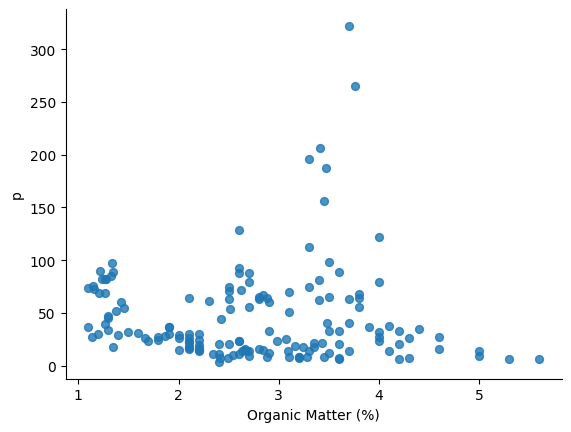

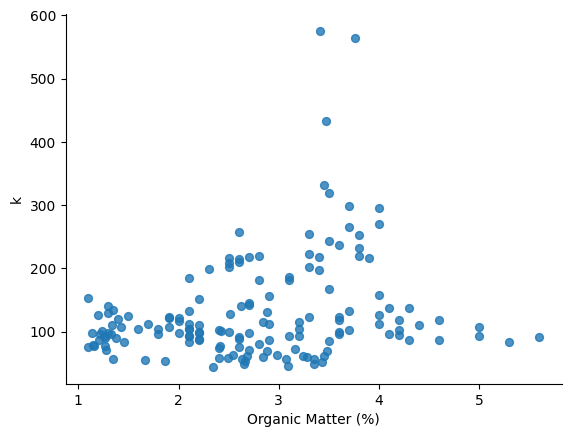

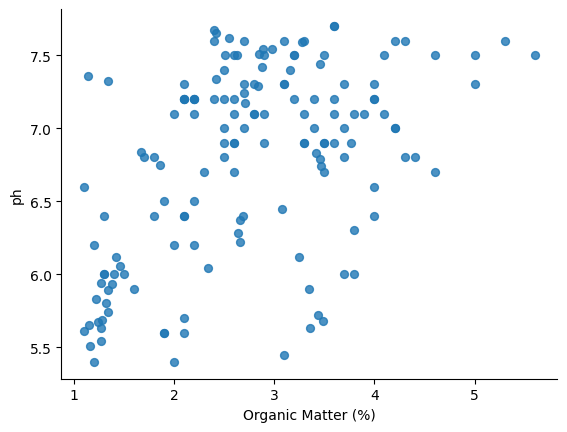

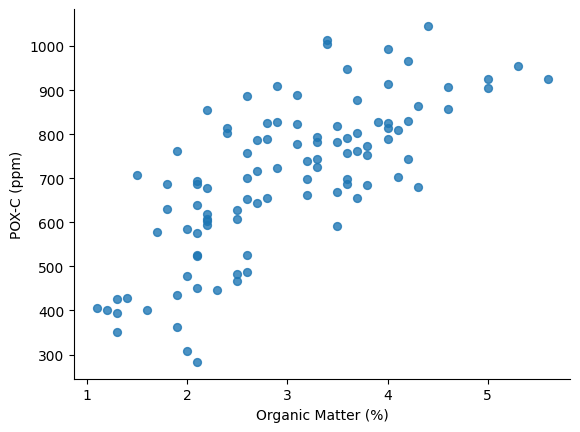

In [112]:
# @title ph vs sikora
soildata30sp=soildataclean[soildataclean['row_spacing'].fillna('').str.contains('30')]

from matplotlib import pyplot as plt
for var in ['p','k','ph','POX-C (ppm)']:
  print(f"Organif matter vs {var}")
  soildata30sp.plot(kind='scatter', x='Organic Matter (%)', y=var, s=32, alpha=.8)
  plt.gca().spines[['top', 'right',]].set_visible(False)

In [115]:
soildata30sp.groupby('trt_x')['siteID_x'].count()

trt_x
Othermix     7
UWmix       41
control     64
mix1        14
mix2         9
mix3         9
othermix     4
own_mix      4
Name: siteID_x, dtype: int64

In [118]:
soildata30sp.groupby(['treatment', 'row_spacing'])['siteID_x'].count()

treatment     row_spacing
control       30"            64
interseeding  30"            88
Name: siteID_x, dtype: int64

In [130]:
import pandas as pd
from sklearn.linear_model import LinearRegression



# Function to perform regression imputation
def regression_imputation(df, target_column, feature_columns):
    # Create a copy of the DataFrame
    df_imputed = df.copy()

    # Drop rows with missing values in the target column
    df_dropna = df_imputed.dropna(subset=[target_column])

    # Separate target and feature columns
    X_train = df_dropna[feature_columns]
    y_train = df_dropna[target_column]

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict missing values
    X_missing = df_imputed.loc[df_imputed[target_column].isna(), feature_columns]
    y_missing = model.predict(X_missing)

    # Replace missing values with predicted values
    df_imputed.loc[df_imputed[target_column].isna(), target_column] = y_missing

    return df_imputed

# Perform regression imputation for column 'A' using columns 'B' and 'C' as features
#imputed_df = regression_imputation(df, target_column='grain_yield_15moisture', feature_columns=['longitude', 'latitude', 'year','treatment_encode'])

#print("Imputed DataFrame:")
#imputed_df['grain_yield_15moisture'].describe()

## Exploratory Data Analysis

In [120]:
import folium

df_locations = soildata30sp[~soildata30sp['latitude'].isna()].groupby('name')[['latitude','longitude']].mean().reset_index()

# Create a base map
m = folium.Map(location=[df_locations['latitude'].mean(), df_locations['longitude'].mean()], zoom_start=6)

# Add markers for each location
for i, row in df_locations.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(m)

# Display the map
m

In [122]:
soildataclean.columns

Index(['siteID_x', 'name', 'year', 'plot_x', 'trt_x', 'treatment',
       'row_spacing', 'time', 'date', 'ph', 'sikora', 'p', 'k',
       'Organic Matter (%)', 'no3-n', 'nh4-n', 'tn', 'tc', 'POX-C (ppm)',
       'siteID_y', 'longitude', 'latitude', 'plot_y', 'trt_y', 'harvest',
       'corn_planting_date', 'interseeding_method', 'interseeding_date',
       'corn_growth_stage', 'corn_population', 'silage (t/ac) at 65%', 'cp',
       'adf_cp', 'ndf_cp', 'NDFD48', 'nfc', 'starch', 'milk ton (lbs/tDM)',
       'grain yield (bu/ac) at 15% moisture',
       'cover_crop_dry_matter_biomass (lbs/ac)',
       'weed_dry_matter_biomass (lbs/ac)'],
      dtype='object')

In [126]:
import pandas as pd

# Filter rows where treatment includes both "interseeding" and "control"
filtered_df = soildataclean.groupby('siteID_x').filter(lambda x: 'interseeding' in x['treatment'].values and 'control' in x['treatment'].values)
filtered_df=filtered_df[filtered_df['treatment'].isin(['interseeding','control'])]
# Display the filtered DataFrame
len(filtered_df)

226

In [127]:
for i in filtered_df.columns:
  nmiss = filtered_df[i].isna().sum()

  print(f"{i} --- {nmiss} --- {np.round(100*nmiss/238, 2)} %")

siteID_x --- 0 --- 0.0 %
name --- 0 --- 0.0 %
year --- 0 --- 0.0 %
plot_x --- 27 --- 11.34 %
trt_x --- 0 --- 0.0 %
treatment --- 0 --- 0.0 %
row_spacing --- 17 --- 7.14 %
time --- 1 --- 0.42 %
date --- 48 --- 20.17 %
ph --- 0 --- 0.0 %
sikora --- 131 --- 55.04 %
p --- 0 --- 0.0 %
k --- 0 --- 0.0 %
Organic Matter (%) --- 0 --- 0.0 %
no3-n --- 148 --- 62.18 %
nh4-n --- 148 --- 62.18 %
tn --- 91 --- 38.24 %
tc --- 91 --- 38.24 %
POX-C (ppm) --- 78 --- 32.77 %
siteID_y --- 29 --- 12.18 %
longitude --- 29 --- 12.18 %
latitude --- 29 --- 12.18 %
plot_y --- 51 --- 21.43 %
trt_y --- 29 --- 12.18 %
harvest --- 39 --- 16.39 %
corn_planting_date --- 64 --- 26.89 %
interseeding_method --- 226 --- 94.96 %
interseeding_date --- 29 --- 12.18 %
corn_growth_stage --- 33 --- 13.87 %
corn_population --- 112 --- 47.06 %
silage (t/ac) at 65% --- 94 --- 39.5 %
cp --- 94 --- 39.5 %
adf_cp --- 94 --- 39.5 %
ndf_cp --- 94 --- 39.5 %
NDFD48 --- 94 --- 39.5 %
nfc --- 94 --- 39.5 %
starch --- 94 --- 39.5 %
milk t

In [173]:
filtered_df=filtered_df[filtered_df['row_spacing'].fillna('').str.contains('3')]
filtered_df['treatment_encode']=filtered_df['treatment'].apply(lambda x: 1 if x=='control' else [0 if x=='interseeding' else -1][0])

def float_tr(x):
  try:
    y=float(x)
  except:
    y=None
  return y

filtered_df = filtered_df.replace('na', None)
filtered_df['grain_yield_15moisture']=filtered_df['grain yield (bu/ac) at 15% moisture'].apply(lambda x: float_tr(x))

<ipython-input-173-a052ae5f2bab>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [174]:
df = filtered_df
df = df.replace('na', None)
df=df[~df['latitude'].isna()]
imputed_df = regression_imputation(df, target_column='grain_yield_15moisture', feature_columns=['latitude', 'year','treatment_encode'])

print("Imputed DataFrame:")
imputed_df['grain_yield_15moisture'].describe()

Imputed DataFrame:


count    144.000000
mean     178.618578
std       24.179672
min        0.000000
25%      169.925987
50%      187.298705
75%      194.727959
max      219.738402
Name: grain_yield_15moisture, dtype: float64

In [235]:
imputed_df1 = imputed_df


for c in ['cp','adf_cp','ndf_cp','NDFD48','nfc']:
  imputed_df1[c]=imputed_df1[c].apply(lambda x: float_tr(x))
  imputed_df1=regression_imputation(imputed_df1, target_column=c, feature_columns=['latitude', 'year','treatment_encode'])
  print(imputed_df1[c].describe(percentiles=[0.05,.1,.2,.25,.3,.5,.75, 0.95]))

count    144.000000
mean       6.991843
std        0.913834
min        5.230000
5%         6.220000
10%        6.232000
20%        6.300000
25%        6.322500
30%        6.431186
50%        6.608450
75%        7.410000
95%        8.900000
max        8.910000
Name: cp, dtype: float64
count    144.000000
mean       0.567846
std        0.044952
min        0.410000
5%         0.480000
10%        0.510000
20%        0.540000
25%        0.547156
30%        0.558689
50%        0.567804
75%        0.598194
95%        0.645500
max        0.650000
Name: adf_cp, dtype: float64
count    144.000000
mean       6.373928
std        5.021061
min        0.675102
5%         1.300000
10%        1.300000
20%        1.300000
25%        1.300000
30%        1.300000
50%        6.742596
75%        9.742934
95%       10.242083
max       23.300000
Name: ndf_cp, dtype: float64
count    144.000000
mean      65.091889
std        2.578372
min       59.850000
5%        61.240000
10%       62.431848
20%       62.9724

### Forage Quality of interseeding

Calculate Relative Feed Value (RFV): RFV is a common measure of forage quality that combines the digestibility and potential intake of the forage. You can calculate RFV using the following formula:

In [214]:
def calculate_rfv(adf_cp, ndf_cp):
    # Calculate ADF and NDF percentages
    adf = adf_cp / cp * 100
    ndf = ndf_cp / cp * 100

    # Calculate DDM and DMI
    ddm = 88.9 - (0.779 * adf)
    dmi = 120 / ndf

    # Calculate RFV
    rfv = (ddm * dmi) / 1.29

    return rfv

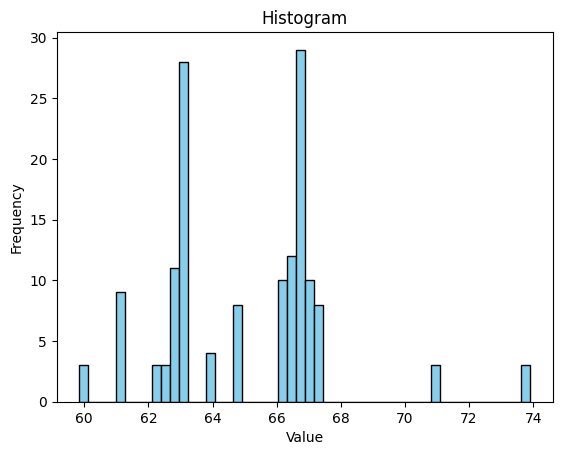

In [224]:
plt.hist(imputed_df1['NDFD48'].values, bins=50, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()

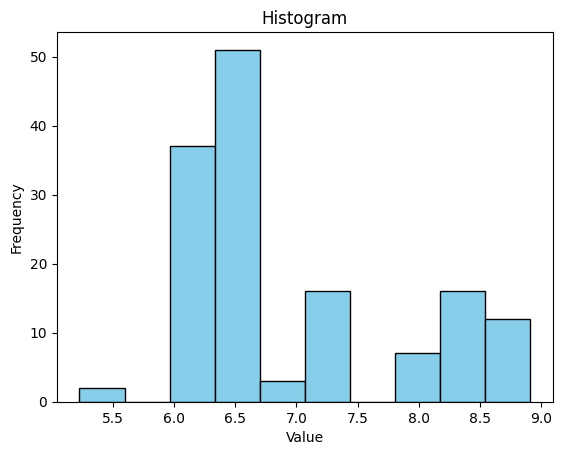

In [222]:
plt.hist(imputed_df1['cp'].values, bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()

In [244]:
# Step 1: Calculate ADF
imputed_df1['ADF'] = imputed_df1['adf_cp'] / imputed_df1['cp'] * 100

# Step 2: Calculate DDM
imputed_df1['DDM'] = 88.9 - (0.779 * imputed_df1['ADF'])

# Step 3: Calculate DMI
imputed_df1['DMI'] = 120 / (imputed_df1['NDFD48'])

# Step 4: Calculate RFV
imputed_df1['RFV'] = (imputed_df1['DDM'] * imputed_df1['DMI']) / 1.29

In [246]:
# Normalize RFV to a 0-1 scale (assuming optimal range is 100-150)
imputed_df1['NormalizedRFV'] = imputed_df1.apply(lambda row: max(min((row['RFV'] - 100) / 50, 1), row['RFV'] / 100), axis=1)


In [247]:
imputed_df1['ADF'].describe(), imputed_df1['DDM'].describe(), imputed_df1['DMI'].describe(), imputed_df1['RFV'].describe(), imputed_df1['NormalizedRFV'].describe()

(count    144.000000
 mean       8.259130
 std        1.266495
 min        6.285073
 25%        6.747481
 50%        8.945687
 75%        9.201906
 max       10.450161
 Name: ADF, dtype: float64,
 count    144.000000
 mean      82.466138
 std        0.986600
 min       80.759325
 25%       81.731715
 50%       81.931310
 75%       83.643712
 max       84.003928
 Name: DDM, dtype: float64,
 count    144.000000
 mean       1.846366
 std        0.071808
 min        1.623596
 25%        1.797617
 50%        1.816652
 75%        1.902950
 max        2.005013
 Name: DMI, dtype: float64,
 count    144.000000
 mean     118.071775
 std        5.703652
 min      104.069262
 25%      113.893262
 50%      115.091376
 75%      123.309384
 max      130.565061
 Name: RFV, dtype: float64,
 count    144.000000
 mean       1.180718
 std        0.057037
 min        1.040693
 25%        1.138933
 50%        1.150914
 75%        1.233094
 max        1.305651
 Name: NormalizedRFV, dtype: float64)

In [248]:
imputed_df1.groupby('treatment')['RFV'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
control,59.0,116.968342,5.137990,108.405152,113.797227,113.988535,119.799844,130.565061
interseeding,85.0,118.837687,5.975334,104.069262,114.004234,120.861357,123.459848,127.327284


In [249]:
imputed_df1['RFV'].describe()

count    144.000000
mean     118.071775
std        5.703652
min      104.069262
25%      113.893262
50%      115.091376
75%      123.309384
max      130.565061
Name: RFV, dtype: float64

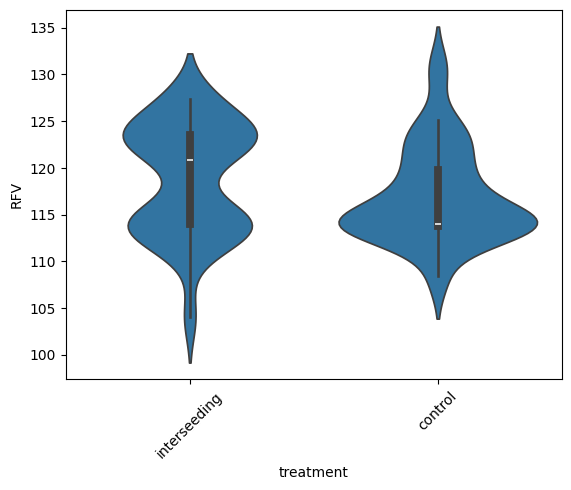

In [250]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create some sample data
df = imputed_df1

# Create a violin plot
sns.violinplot(x = "treatment", y = "RFV",  data=imputed_df1)

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)
plt.show()


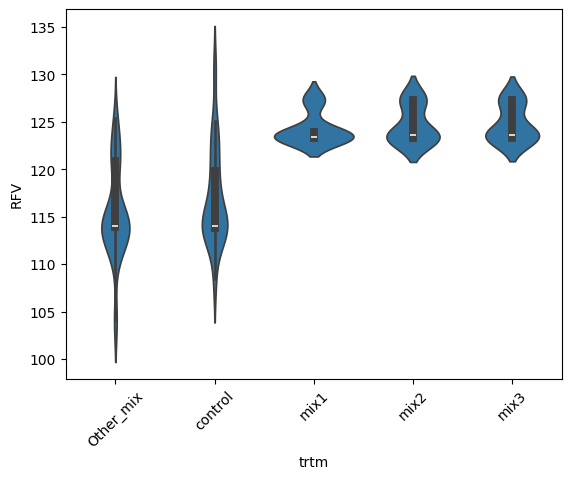

In [251]:
from re import X
def trt_map(x):
  if '1' in x or '2' in x or '3' in x or 'cont' in x:
    return x
  else:
    return 'Other_mix'


imputed_df1['trtm']=imputed_df1['trt_x'].apply(lambda x: trt_map(x))
# Create a violin plot
sns.violinplot(x = "trtm", y = "RFV",  data=imputed_df1)

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)
plt.show()

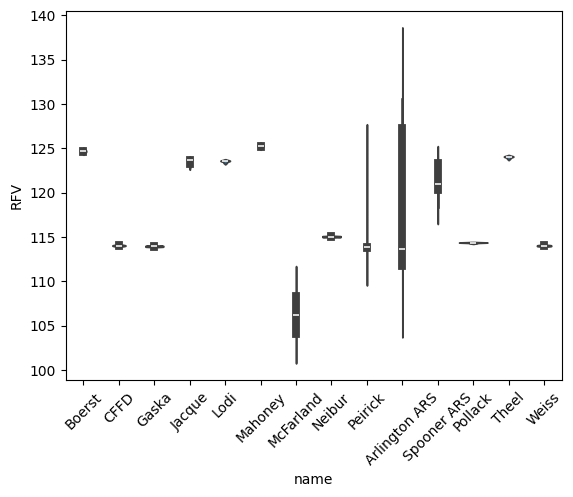

In [252]:
sns.violinplot(x = "name", y = "RFV",  data=imputed_df1)

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)
plt.show()

In [253]:
import numpy as np
from scipy.stats import ttest_ind

# Function to calculate Cohen's d
def cohen_d(group1, group2):
    """Compute Cohen's d effect size.

    Parameters:
    group1 (array-like): First group of observations.
    group2 (array-like): Second group of observations.

    Returns:
    float: Cohen's d effect size.
    """
    mean_diff = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt((np.std(group1, ddof=1) ** 2 + np.std(group2, ddof=1) ** 2) / 2)
    return mean_diff / pooled_std




In [254]:
from scipy.stats import ttest_ind


control = imputed_df1[imputed_df1['treatment'] == 'control']['RFV']
interseeding = imputed_df1[imputed_df1['treatment'] == 'interseeding']['RFV']
# Assuming 'control' and 'interseeding' are your two groups
t_stat, p_value = ttest_ind(control, interseeding, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference in means between the two groups is statistically significant (reject the null hypothesis).")
else:
    print("There is not enough evidence to conclude a statistically significant difference in means between the two groups (fail to reject the null hypothesis).")


T-statistic: -2.0070417590048724
P-value: 0.046734091033474645
The difference in means between the two groups is statistically significant (reject the null hypothesis).


In [255]:
import numpy as np
from statsmodels.stats.power import TTestIndPower

# Example data
control = imputed_df1[imputed_df1['treatment'] == 'control']['RFV']
interseeding = imputed_df1[imputed_df1['treatment'] == 'interseeding']['RFV']

# Calculate Cohen's d
effect_size = cohen_d(control, interseeding)
print("Cohen's d effect size:", effect_size)

# Set parameters

alpha = 0.05
power = 0.8

# Calculate sample size
analysis_t = TTestIndPower()
n_t_test = analysis_t.solve_power(effect_size=effect_size, alpha=alpha, power=power)

print("Required sample size:", int(np.ceil(n_t_test)))


Cohen's d effect size: -0.3354643776011357
Required sample size: 141


In [256]:
len(control), len(interseeding)

(59, 85)

In [257]:
#<75 75-86 87-102 103-124 125-150 >150
def rfv_class(x):
  if x<75:
    return '<75'
  elif x>=150:
    return '>150'
  elif x>=75 and x<86:
    return '75-86'
  elif x>=87 and x<102:
    return '87-102'
  elif x>=103 and x<124:
    return '103-124'
  elif x>=125 and x<150:
    return '125-150'

imputed_df1['RFV_class']=imputed_df1['RFV'].apply(lambda x: rfv_class(x))

In [258]:
imputed_df1.groupby('RFV_class')['siteID_x'].count()

RFV_class
103-124    125
125-150     14
Name: siteID_x, dtype: int64

In [259]:
imputed_df1['NormalizedRFV'].describe()

count    144.000000
mean       1.180718
std        0.057037
min        1.040693
25%        1.138933
50%        1.150914
75%        1.233094
max        1.305651
Name: NormalizedRFV, dtype: float64

In [260]:
imputed_df1['ph'].describe(), imputed_df1['p'].describe(), imputed_df1['Organic Matter (%)'].describe(), imputed_df1['NormalizedRFV'].describe()

(count    144.000000
 mean       6.755972
 std        0.664834
 min        5.400000
 25%        6.200000
 50%        6.900000
 75%        7.300000
 max        7.700000
 Name: ph, dtype: float64,
 count    144.000000
 mean      44.407611
 std       46.908871
 min        3.554000
 25%       15.937000
 50%       28.666000
 75%       63.000000
 max      322.000000
 Name: p, dtype: float64,
 count    144.000000
 mean       2.748050
 std        1.022625
 min        1.098281
 25%        2.000000
 50%        2.691644
 75%        3.486760
 max        5.600000
 Name: Organic Matter (%), dtype: float64,
 count    144.000000
 mean       1.180718
 std        0.057037
 min        1.040693
 25%        1.138933
 50%        1.150914
 75%        1.233094
 max        1.305651
 Name: NormalizedRFV, dtype: float64)

In [261]:
import pandas as pd
import numpy as np

def calculate_soil_health_score(df):
    """
    Calculate a soil health score based on pH, P, K, Organic Matter (%), and RFV.

    Args:
        df (pandas.DataFrame): DataFrame containing the columns 'pH', 'P', 'K', 'Organic Matter (%)', and 'RFV'.

    Returns:
        pandas.DataFrame: DataFrame with an additional column 'Soil Health Score'.
    """

    # Define optimal ranges and weights for each variable
    optimal_ranges = {
        'ph': (6.2, 7.3),
        'p': (15.93, 63),
        'K': (100, 300),
        'Organic Matter (%)': (2.0, 3.48),
        'RFV': (100, 150)
    }

    weights = {
        'ph': 0.25,
        'p': 0.25,
        'K': 0.0,
        'Organic Matter (%)': 0.25,
        'RFV': 0.25
    }

    # Calculate individual scores
    scores = []
    for variable in ['ph', 'p', 'Organic Matter (%)', 'RFV']:
        low, high = optimal_ranges[variable]
        score = df[variable].apply(lambda x: max(min((x - low) / (high - low), 1), x / low) if low < x < high else min(1, high / x))
        scores.append(score * weights[variable])

    # Calculate overall soil health score
    overall_score = sum(scores)

    # Add the soil health score column to the DataFrame
    df['SoilHealthScore'] = overall_score * 100

    return df


df = pd.DataFrame(imputed_df1)
df_with_score = calculate_soil_health_score(df)

print(df_with_score)

     siteID_x    name  year   plot_x     trt_x     treatment row_spacing  \
2           A  Boerst  2021      NaN  othermix  interseeding         30"   
3           A  Boerst  2021      NaN   control       control         30"   
7           B    CFFD  2022       C2     UWmix  interseeding         30"   
8           B    CFFD  2022       C2   control       control         30"   
28          K   Gaska  2022        3   control       control         30"   
...       ...     ...   ...      ...       ...           ...         ...   
1007        W   Theel  2021      NaN  othermix  interseeding         30"   
1020        X   Weiss  2022      NaN  Othermix  interseeding         30"   
1021        X   Weiss  2022      NaN   control       control         30"   
1022        X   Weiss  2022  Weiss_1   control       control         30"   
1023        X   Weiss  2022  Weiss_2   own_mix  interseeding         30"   

        time       date    ph  ...  grain_yield_15moisture       ADF  \
2       Fall   

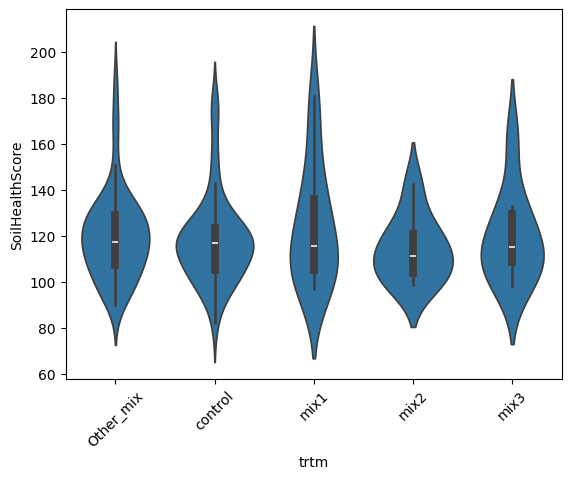

In [262]:
# Create a violin plot
sns.violinplot(x = "trtm", y = "SoilHealthScore",  data=imputed_df1)

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)
plt.show()

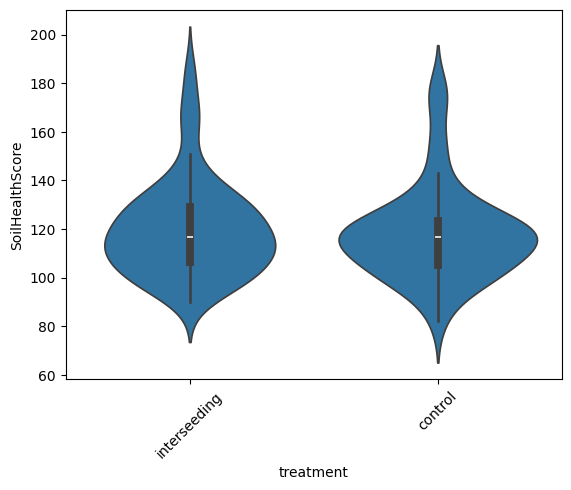

In [263]:
# Create a violin plot
sns.violinplot(x = "treatment", y = "SoilHealthScore",  data=imputed_df1)

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)
plt.show()

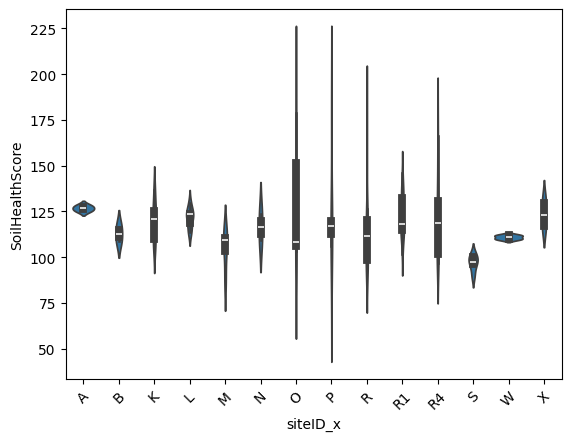

In [264]:
sns.violinplot(x = "siteID_x", y = "SoilHealthScore",  data=imputed_df1)

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)
plt.show()

In [265]:
import numpy as np
from statsmodels.stats.power import TTestIndPower

# Example data
control = imputed_df1[imputed_df1['treatment'] == 'control']['SoilHealthScore']
interseeding = imputed_df1[imputed_df1['treatment'] == 'interseeding']['SoilHealthScore']

# Calculate Cohen's d
effect_size = cohen_d(control, interseeding)
print("Cohen's d effect size:", effect_size)

# Set parameters

alpha = 0.05
power = 0.8

# Calculate sample size
analysis_t = TTestIndPower()
n_t_test = analysis_t.solve_power(effect_size=effect_size, alpha=alpha, power=power)

print("Required sample size:", int(np.ceil(n_t_test)))


Cohen's d effect size: -0.09663080080052296
Required sample size: 1683


In [266]:
from scipy.stats import ttest_ind


control = imputed_df1[imputed_df1['treatment'] == 'control']['SoilHealthScore']
interseeding = imputed_df1[imputed_df1['treatment'] == 'interseeding']['SoilHealthScore']
# Assuming 'control' and 'interseeding' are your two groups
t_stat, p_value = ttest_ind(control, interseeding, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference in means between the two groups is statistically significant (reject the null hypothesis).")
else:
    print("There is not enough evidence to conclude a statistically significant difference in means between the two groups (fail to reject the null hypothesis).")

T-statistic: -0.5716814749552374
P-value: 0.5685475637329827
There is not enough evidence to conclude a statistically significant difference in means between the two groups (fail to reject the null hypothesis).


### Q1

In [275]:
filtered_df=imputed_df1

filtered_df['treatment_encode']=filtered_df['treatment'].apply(lambda x: 1 if x=='control' else 0)

def float_tr(x):
  try:
    y=float(x)
  except:
    y=None
  return y

filtered_df = filtered_df.replace('na', None)
filtered_df['grain_yield_15moisture']=filtered_df['grain yield (bu/ac) at 15% moisture'].apply(lambda x: float_tr(x))

In [287]:
imputed_df1.to_csv('soilhealth_interseeding_corn.csv')

In [280]:
filtered_df[['longitude', 'year','treatment_encode']]

,longitude,year,treatment_encode
2,-88.937748,2021,0
3,-88.937748,2021,1
7,-87.938084,2022,0
8,-87.938084,2022,1
28,-88.947574,2022,1
...,...,...,...
1007,-88.307487,2021,0
1020,-88.782064,2022,0
1021,-88.782064,2022,1
1022,-88.782064,2022,1


In [281]:
c='grain yield (bu/ac) at 15% moisture'
filtered_df[c]=filtered_df[c].apply(lambda x: float_tr(x))
filtered_df=regression_imputation(filtered_df, target_column=c, feature_columns=['longitude', 'year','treatment_encode'])
print(filtered_df[c].describe(percentiles=[0.05,.1,.2,.25,.3,.5,.75, 0.95]))

count    144.000000
mean     180.269257
std       25.827769
min        0.000000
5%       140.675402
10%      140.675402
20%      157.826691
25%      159.315606
30%      187.849571
50%      191.002367
75%      194.303015
95%      198.522031
max      219.738402
Name: grain yield (bu/ac) at 15% moisture, dtype: float64


In [285]:
len(filtered_df)

144

In [286]:
import pandas as pd
import plotly.express as px

# Create a histogram using Plotly
fig = px.histogram(filtered_df, x='grain yield (bu/ac) at 15% moisture', nbins=45, title='Histogram of grain_yield_15moisture Data', labels={'value': 'grain yield bu/ac', 'count': 'Frequency'})

# Show the plot
fig.show()

In [284]:


from scipy.stats import shapiro, levene

# Example data for two groups (replace with your actual data)
group1 = imputed_df[imputed_df['treatment']!='control']['grain yield (bu/ac) at 15% moisture'].values
group2 = imputed_df[imputed_df['treatment']=='control']['grain yield (bu/ac) at 15% moisture'].values

# Shapiro-Wilk test for normality
shapiro_stat1, shapiro_pvalue1 = shapiro(group1)
shapiro_stat2, shapiro_pvalue2 = shapiro(group2)

print("Shapiro-Wilk test for normality:")
print("Group 1 - Statistic:", shapiro_stat1, "p-value:", shapiro_pvalue1)
print("Group 2 - Statistic:", shapiro_stat2, "p-value:", shapiro_pvalue2)

# Levene's test for homogeneity of variance
levene_stat, levene_pvalue = levene(group1, group2)

print("\nLevene's test for homogeneity of variance:")
print("Statistic:", levene_stat, "p-value:", levene_pvalue)


TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

# END

In [267]:
import plotly.express as px
import pandas as pd


df = imputed_df1

# Create histogram
fig = px.histogram(df, x='RFV', color='treatment')


# Show plot
fig.show()


In [268]:
# Create histogram
fig = px.histogram(df, x='RFV', color='treatment')


# Show plot
fig.show()


In [141]:
imputed_df1.groupby('treatment')['RFV'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
control,77.0,201.266397,185.073434,21.816999,54.436782,81.389023,392.847901,537.253667
interseeding,120.0,231.298820,193.074439,22.349017,52.483416,113.827661,428.080859,533.830411


In [142]:
imputed_df1.groupby('treatment')['NormalizedRFV'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
control,77.0,2.012664,1.850734,0.21817,0.544368,0.813890,3.928479,5.372537
interseeding,120.0,2.312988,1.930744,0.22349,0.524834,1.138277,4.280809,5.338304


## Yield Data

In [19]:
#df_soil = pd.read_csv(path_sources+'mycopy_interseeding_master.csv')

import pandas as pd

# Replace 'your_file.xlsx' with the actual path to your file
df_yielddta0 = pd.read_excel(path_sources+'interseeding_master.xlsx', sheet_name='yield_data')
df_yielddta0

,siteID,name,longitude,latitude,year,plot,trt,treatment,row_spacing,harvest,...,cp,adf_cp,ndf_cp,NDFD48,nfc,starch,milk ton (lbs/tDM),grain yield (bu/ac) at 15% moisture,cover_crop_dry_matter_biomass (lbs/ac),weed_dry_matter_biomass (lbs/ac)
0,A,Boerst,-88.937748,44.464710,2021,2,control,control,"30""",silage,...,na,na,na,na,na,na,na,na,na,na
1,A,Boerst,-88.937748,44.464710,2021,2,control,control,"60""",silage,...,na,na,na,na,na,na,na,na,na,na
2,A,Boerst,-88.937748,44.464710,2021,1,othermix,interseeding,"30""",silage,...,na,na,na,na,na,na,na,na,na,na
3,A,Boerst,-88.937748,44.464710,2021,3,othermix,interseeding,"60""",silage,...,na,na,na,na,na,na,na,na,na,na
4,B,CFFD,-87.938084,43.446201,2022,NaN,control,control,"30""",grain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,X,Weiss,-88.782064,43.428084,2023,4,own_mix,interseeding,"30""",grain,...,na,na,na,na,na,na,na,230,42.823521,0
325,X,Weiss,-88.782064,43.428084,2023,5,control,control,"30""",grain,...,na,na,na,na,na,na,na,226,0,0
326,X,Weiss,-88.782064,43.428084,2023,6,own_mix,interseeding,"30""",grain,...,na,na,na,na,na,na,na,220,249.803873,0
327,Y,Winker,-87.922806,43.472556,2021,1,mix2,interseeding,"30""",silage,...,6.38,0.39,1.3,65.81,42.64,26.27,3152,na,6088.240674,977.829979


In [20]:
sitestoexcludeyield = []
for siteid in set(df_yielddta0["siteID"].values):
  cases = df_yielddta0[df_yielddta0["siteID"]==siteid]
  if 'control' not in set(cases["treatment"].values):
    print(f"Here there are no control, exclude {siteid}")
    sitestoexcludeyield.append(siteid)

Here there are no control, exclude C
Here there are no control, exclude T
Here there are no control, exclude D
Here there are no control, exclude Q
Here there are no control, exclude Y


In [21]:
df_yielddta=df_yielddta0[~df_yielddta0['siteID'].isin(sitestoexcludeyield)]
len(df_yielddta)

315

In [22]:
df_yielddta

,siteID,name,longitude,latitude,year,plot,trt,treatment,row_spacing,harvest,...,cp,adf_cp,ndf_cp,NDFD48,nfc,starch,milk ton (lbs/tDM),grain yield (bu/ac) at 15% moisture,cover_crop_dry_matter_biomass (lbs/ac),weed_dry_matter_biomass (lbs/ac)
0,A,Boerst,-88.937748,44.464710,2021,2,control,control,"30""",silage,...,na,na,na,na,na,na,na,na,na,na
1,A,Boerst,-88.937748,44.464710,2021,2,control,control,"60""",silage,...,na,na,na,na,na,na,na,na,na,na
2,A,Boerst,-88.937748,44.464710,2021,1,othermix,interseeding,"30""",silage,...,na,na,na,na,na,na,na,na,na,na
3,A,Boerst,-88.937748,44.464710,2021,3,othermix,interseeding,"60""",silage,...,na,na,na,na,na,na,na,na,na,na
4,B,CFFD,-87.938084,43.446201,2022,NaN,control,control,"30""",grain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,X,Weiss,-88.782064,43.428084,2023,2,own_mix,interseeding,"30""",grain,...,na,na,na,na,na,na,na,218,381.843063,0
323,X,Weiss,-88.782064,43.428084,2023,3,control,control,"30""",grain,...,na,na,na,na,na,na,na,231,0,0
324,X,Weiss,-88.782064,43.428084,2023,4,own_mix,interseeding,"30""",grain,...,na,na,na,na,na,na,na,230,42.823521,0
325,X,Weiss,-88.782064,43.428084,2023,5,control,control,"30""",grain,...,na,na,na,na,na,na,na,226,0,0


In [23]:
#clean

In [24]:
print(df_yielddta.columns)

Index(['siteID', 'name', 'longitude', 'latitude', 'year', 'plot', 'trt',
       'treatment', 'row_spacing', 'harvest', 'corn_planting_date',
       'interseeding_method', 'interseeding_date', 'corn_growth_stage',
       'corn_population', 'silage (t/ac) at 65%', 'cp', 'adf_cp', 'ndf_cp',
       'NDFD48', 'nfc', 'starch', 'milk ton (lbs/tDM)',
       'grain yield (bu/ac) at 15% moisture',
       'cover_crop_dry_matter_biomass (lbs/ac)',
       'weed_dry_matter_biomass (lbs/ac)'],
      dtype='object')


In [25]:
df_yielddta1=df_yielddta

for i in ['silage (t/ac) at 65%', 'cp', 'adf_cp', 'ndf_cp',
       'NDFD48', 'nfc', 'starch', 'milk ton (lbs/tDM)',
       'grain yield (bu/ac) at 15% moisture',
       'cover_crop_dry_matter_biomass (lbs/ac)',
       'weed_dry_matter_biomass (lbs/ac)']:
  df_yielddta1[i] = pd.to_numeric(df_yielddta1[i], errors='coerce')

df_yielddta1

<ipython-input-25-a86006177058>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,siteID,name,longitude,latitude,year,plot,trt,treatment,row_spacing,harvest,...,cp,adf_cp,ndf_cp,NDFD48,nfc,starch,milk ton (lbs/tDM),grain yield (bu/ac) at 15% moisture,cover_crop_dry_matter_biomass (lbs/ac),weed_dry_matter_biomass (lbs/ac)
0,A,Boerst,-88.937748,44.464710,2021,2,control,control,"30""",silage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,Boerst,-88.937748,44.464710,2021,2,control,control,"60""",silage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,Boerst,-88.937748,44.464710,2021,1,othermix,interseeding,"30""",silage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,Boerst,-88.937748,44.464710,2021,3,othermix,interseeding,"60""",silage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B,CFFD,-87.938084,43.446201,2022,NaN,control,control,"30""",grain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,X,Weiss,-88.782064,43.428084,2023,2,own_mix,interseeding,"30""",grain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.0,381.843063,0.0
323,X,Weiss,-88.782064,43.428084,2023,3,control,control,"30""",grain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.0,0.000000,0.0
324,X,Weiss,-88.782064,43.428084,2023,4,own_mix,interseeding,"30""",grain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.0,42.823521,0.0
325,X,Weiss,-88.782064,43.428084,2023,5,control,control,"30""",grain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.0,0.000000,0.0


In [26]:
print(df_yielddta1.dtypes)

siteID                                            object
name                                              object
longitude                                        float64
latitude                                         float64
year                                               int64
plot                                              object
trt                                               object
treatment                                         object
row_spacing                                       object
harvest                                           object
corn_planting_date                        datetime64[ns]
interseeding_method                               object
interseeding_date                         datetime64[ns]
corn_growth_stage                                 object
corn_population                                  float64
silage (t/ac) at 65%                             float64
cp                                               float64
adf_cp                         

In [27]:
print(soildataclean.columns)

Index(['siteID', 'name', 'year', 'plot', 'trt', 'treatment', 'roW spacing',
       'time', 'date', 'ph', 'sikora', 'p', 'k', 'Organic Matter (%)', 'no3-n',
       'nh4-n', 'tn', 'tc', 'POX-C (ppm)'],
      dtype='object')


In [28]:
clean=soildataclean.rename(columns={'roW spacing':'row_spacing'})
df_yielddta1=df_yielddta1.rename(columns={'roW spacing':'row_spacing'})

In [29]:
print(df_yielddta1.columns), print(clean.columns)

Index(['siteID', 'name', 'longitude', 'latitude', 'year', 'plot', 'trt',
       'treatment', 'row_spacing', 'harvest', 'corn_planting_date',
       'interseeding_method', 'interseeding_date', 'corn_growth_stage',
       'corn_population', 'silage (t/ac) at 65%', 'cp', 'adf_cp', 'ndf_cp',
       'NDFD48', 'nfc', 'starch', 'milk ton (lbs/tDM)',
       'grain yield (bu/ac) at 15% moisture',
       'cover_crop_dry_matter_biomass (lbs/ac)',
       'weed_dry_matter_biomass (lbs/ac)'],
      dtype='object')
Index(['siteID', 'name', 'year', 'plot', 'trt', 'treatment', 'row_spacing',
       'time', 'date', 'ph', 'sikora', 'p', 'k', 'Organic Matter (%)', 'no3-n',
       'nh4-n', 'tn', 'tc', 'POX-C (ppm)'],
      dtype='object')


(None, None)

In [30]:
merged = df_yielddta1.merge(clean, on =['siteID', 'name','year', 'plot','row_spacing'], how='inner')
merged.drop_duplicates()

,siteID,name,longitude,latitude,year,plot,trt_x,treatment_x,row_spacing,harvest,...,ph,sikora,p,k,Organic Matter (%),no3-n,nh4-n,tn,tc,POX-C (ppm)
0,K,Gaska,-88.947574,43.352339,2022,1,control,control,"60""",grain,...,7.2,NaN,17.000,104.0,2.200000,NaN,NaN,NaN,NaN,691.0
1,K,Gaska,-88.947574,43.352339,2022,2,UWmix,interseeding,"60""",grain,...,7.1,NaN,25.000,149.0,2.300000,NaN,NaN,NaN,NaN,686.3
2,K,Gaska,-88.947574,43.352339,2022,3,control,control,"30""",grain,...,7.2,NaN,24.000,111.0,2.200000,NaN,NaN,NaN,NaN,677.1
3,K,Gaska,-88.947574,43.352339,2022,4,UWmix,interseeding,"30""",grain,...,7.2,NaN,26.000,105.0,2.100000,NaN,NaN,NaN,NaN,686.3
4,K,Gaska,-88.947574,43.352339,2022,5,control,control,"60""",grain,...,7.2,NaN,27.000,104.0,2.100000,NaN,NaN,NaN,NaN,642.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,W,Theel,-88.307487,43.798697,2021,NaN,othermix,interseeding,"30""",grain,...,7.4,NaN,7.092,58.4,2.494518,5.1,4.1,0.13,1.83,NaN
153,X,Weiss,-88.782064,43.428084,2022,NaN,own_mix,interseeding,"30""",grain,...,7.0,NaN,33.000,119.0,4.200000,NaN,NaN,NaN,NaN,967.1
154,X,Weiss,-88.782064,43.428084,2022,NaN,own_mix,interseeding,"30""",grain,...,6.8,NaN,35.000,110.0,4.400000,NaN,NaN,NaN,NaN,1045.8
155,X,Weiss,-88.782064,43.428084,2022,NaN,control,control,"30""",grain,...,7.0,NaN,33.000,119.0,4.200000,NaN,NaN,NaN,NaN,967.1


In [31]:
len(merged), len(soildataclean), len(df_yielddta1)

(157, 238, 315)

In [32]:
merged.groupby('row_spacing')['siteID'].count()

row_spacing
30"    134
60"     23
Name: siteID, dtype: int64

In [33]:
print(merged.columns)

Index(['siteID', 'name', 'longitude', 'latitude', 'year', 'plot', 'trt_x',
       'treatment_x', 'row_spacing', 'harvest', 'corn_planting_date',
       'interseeding_method', 'interseeding_date', 'corn_growth_stage',
       'corn_population', 'silage (t/ac) at 65%', 'cp', 'adf_cp', 'ndf_cp',
       'NDFD48', 'nfc', 'starch', 'milk ton (lbs/tDM)',
       'grain yield (bu/ac) at 15% moisture',
       'cover_crop_dry_matter_biomass (lbs/ac)',
       'weed_dry_matter_biomass (lbs/ac)', 'trt_y', 'treatment_y', 'time',
       'date', 'ph', 'sikora', 'p', 'k', 'Organic Matter (%)', 'no3-n',
       'nh4-n', 'tn', 'tc', 'POX-C (ppm)'],
      dtype='object')


In [34]:
duplicates = merged[merged.duplicated(subset=['siteID', 'name', 'year', 'plot', 'trt_x',
       'treatment_x','interseeding_method', 'interseeding_date', 'corn_growth_stage','p','k','Organic Matter (%)',
       'corn_population'], keep=False)]

# Get the keys (indices) of the duplicated rows
#keys_of_duplicates = duplicates.index.tolist()

duplicates.sort_values(['p','k'])

,siteID,name,longitude,latitude,year,plot,trt_x,treatment_x,row_spacing,harvest,...,ph,sikora,p,k,Organic Matter (%),no3-n,nh4-n,tn,tc,POX-C (ppm)
140,W,Theel,-88.307487,43.798697,2021,NaN,control,control,"30""",grain,...,7.67,NaN,3.554,58.7,2.399843,7.5,3.8,0.13,1.70,NaN
145,W,Theel,-88.307487,43.798697,2021,NaN,control,control,"30""",grain,...,7.67,NaN,3.554,58.7,2.399843,7.5,3.8,0.13,1.70,NaN
142,W,Theel,-88.307487,43.798697,2021,NaN,control,control,"30""",grain,...,7.40,NaN,7.092,58.4,2.494518,5.1,4.1,0.13,1.83,NaN
147,W,Theel,-88.307487,43.798697,2021,NaN,control,control,"30""",grain,...,7.40,NaN,7.092,58.4,2.494518,5.1,4.1,0.13,1.83,NaN
141,W,Theel,-88.307487,43.798697,2021,NaN,control,control,"30""",grain,...,7.65,NaN,7.092,77.6,2.417965,9.0,2.9,0.12,2.12,NaN
146,W,Theel,-88.307487,43.798697,2021,NaN,control,control,"30""",grain,...,7.65,NaN,7.092,77.6,2.417965,9.0,2.9,0.12,2.12,NaN
138,W,Theel,-88.307487,43.798697,2021,NaN,control,control,"30""",grain,...,7.42,NaN,8.448,69.4,2.881199,7.9,3.0,0.17,1.88,NaN
143,W,Theel,-88.307487,43.798697,2021,NaN,control,control,"30""",grain,...,7.42,NaN,8.448,69.4,2.881199,7.9,3.0,0.17,1.88,NaN
139,W,Theel,-88.307487,43.798697,2021,NaN,control,control,"30""",grain,...,7.62,NaN,9.987,63.2,2.547299,6.5,3.7,0.14,1.83,NaN
144,W,Theel,-88.307487,43.798697,2021,NaN,control,control,"30""",grain,...,7.62,NaN,9.987,63.2,2.547299,6.5,3.7,0.14,1.83,NaN


In [35]:
list(duplicates.sort_values(['p','k']).index)

[140, 145, 142, 147, 141, 146, 138, 143, 139, 144, 64, 65, 66, 67, 68]

In [36]:
merged1=merged[~merged.index.isin([140,  142,  141,  138,  139,  64,  66])]
merged1

,siteID,name,longitude,latitude,year,plot,trt_x,treatment_x,row_spacing,harvest,...,ph,sikora,p,k,Organic Matter (%),no3-n,nh4-n,tn,tc,POX-C (ppm)
0,K,Gaska,-88.947574,43.352339,2022,1,control,control,"60""",grain,...,7.2,NaN,17.000,104.0,2.200000,NaN,NaN,NaN,NaN,691.0
1,K,Gaska,-88.947574,43.352339,2022,2,UWmix,interseeding,"60""",grain,...,7.1,NaN,25.000,149.0,2.300000,NaN,NaN,NaN,NaN,686.3
2,K,Gaska,-88.947574,43.352339,2022,3,control,control,"30""",grain,...,7.2,NaN,24.000,111.0,2.200000,NaN,NaN,NaN,NaN,677.1
3,K,Gaska,-88.947574,43.352339,2022,4,UWmix,interseeding,"30""",grain,...,7.2,NaN,26.000,105.0,2.100000,NaN,NaN,NaN,NaN,686.3
4,K,Gaska,-88.947574,43.352339,2022,5,control,control,"60""",grain,...,7.2,NaN,27.000,104.0,2.100000,NaN,NaN,NaN,NaN,642.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,W,Theel,-88.307487,43.798697,2021,NaN,othermix,interseeding,"30""",grain,...,7.4,NaN,7.092,58.4,2.494518,5.1,4.1,0.13,1.83,NaN
153,X,Weiss,-88.782064,43.428084,2022,NaN,own_mix,interseeding,"30""",grain,...,7.0,NaN,33.000,119.0,4.200000,NaN,NaN,NaN,NaN,967.1
154,X,Weiss,-88.782064,43.428084,2022,NaN,own_mix,interseeding,"30""",grain,...,6.8,NaN,35.000,110.0,4.400000,NaN,NaN,NaN,NaN,1045.8
155,X,Weiss,-88.782064,43.428084,2022,NaN,control,control,"30""",grain,...,7.0,NaN,33.000,119.0,4.200000,NaN,NaN,NaN,NaN,967.1


In [37]:
len(merged1.drop_duplicates())

150

In [38]:
print(merged1.columns)

Index(['siteID', 'name', 'longitude', 'latitude', 'year', 'plot', 'trt_x',
       'treatment_x', 'row_spacing', 'harvest', 'corn_planting_date',
       'interseeding_method', 'interseeding_date', 'corn_growth_stage',
       'corn_population', 'silage (t/ac) at 65%', 'cp', 'adf_cp', 'ndf_cp',
       'NDFD48', 'nfc', 'starch', 'milk ton (lbs/tDM)',
       'grain yield (bu/ac) at 15% moisture',
       'cover_crop_dry_matter_biomass (lbs/ac)',
       'weed_dry_matter_biomass (lbs/ac)', 'trt_y', 'treatment_y', 'time',
       'date', 'ph', 'sikora', 'p', 'k', 'Organic Matter (%)', 'no3-n',
       'nh4-n', 'tn', 'tc', 'POX-C (ppm)'],
      dtype='object')


In [39]:
len(merged1)

150

In [43]:
locations = df_yielddta1.groupby('name')[['latitude','longitude']].mean().reset_index()
locations

,name,latitude,longitude
0,Arlington ARS,43.302764,-89.345780
1,Boerst,44.464710,-88.937748
2,CFFD,43.446201,-87.938084
3,Franseen,44.721298,-90.004868
4,Furseth,42.905417,-89.260694
5,Gaska,43.352339,-88.947574
6,Jacque,43.413648,-87.904241
7,Lodi,43.349229,-89.632813
8,Mahoney,44.988408,-88.327868
9,Marshfield ARS,44.761396,-90.100207


In [41]:
locations.columns

Index(['name', 'latitude', 'longitude'], dtype='object')

In [362]:
pip install geopy


In [44]:
import pandas as pd
from geopy.geocoders import Nominatim

def get_state_county(lat, lon):
    """
    Get the state and county from latitude and longitude coordinates.

    Args:
        lat (float): Latitude coordinate.
        lon (float): Longitude coordinate.

    Returns:
        tuple: A tuple containing the state and county names, or (None, None) if the location cannot be determined.
    """
    geolocator = Nominatim(user_agent="my_app")
    try:
        location = geolocator.reverse(f"{lat}, {lon}")
        if location:
            address = location.raw['address']
            state = address.get('state', None)
            county = address.get('county', None)
            return state, county
    except:
        pass
    return None, None

# Create a sample DataFrame
df = locations

# Add state and county columns
df['state'] = df.apply(lambda row: get_state_county(row['latitude'], row['longitude'])[0], axis=1)
df['county'] = df.apply(lambda row: get_state_county(row['latitude'], row['longitude'])[1], axis=1)

print(df)

              name   latitude  longitude      state              county
0    Arlington ARS  43.302764 -89.345780  Wisconsin     Columbia County
1           Boerst  44.464710 -88.937748  Wisconsin      Waupaca County
2             CFFD  43.446201 -87.938084       None      Ozaukee County
3         Franseen  44.721298 -90.004868  Wisconsin     Marathon County
4          Furseth  42.905417 -89.260694  Wisconsin         Dane County
5            Gaska  43.352339 -88.947574  Wisconsin        Dodge County
6           Jacque  43.413648 -87.904241  Wisconsin      Ozaukee County
7             Lodi  43.349229 -89.632813  Wisconsin     Columbia County
8          Mahoney  44.988408 -88.327868  Wisconsin       Oconto County
9   Marshfield ARS  44.761396 -90.100207  Wisconsin     Marathon County
10       McFarland  43.428152 -88.782120  Wisconsin        Dodge County
11          Neibur  44.629701 -92.206993  Wisconsin       Pierce County
12         Peirick  43.220619 -88.842461  Wisconsin        Dodge

In [ ]:
df = merged1

# Add state and county columns
df['state'] = df.apply(lambda row: get_state_county(row['latitude'], row['longitude'])[0], axis=1)
df['county'] = df.apply(lambda row: get_state_county(row['latitude'], row['longitude'])[1], axis=1)

print(df)

In [360]:
from geopy.geocoders import Nominatim

def get_county_state(latitude, longitude):
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.reverse((latitude, longitude), exactly_one=True)
    address = location.raw['address']
    county = address.get('county', '')
    state = address.get('state', '')
    print("County:", county)
    print("State:", state)

    return county


locations['county_state']=locations.apply(lambda row: get_county_state(row['latitude'], row['longitude']))


KeyError: 'latitude'

In [49]:
import folium

df_locations = df_yielddta.groupby('name')[['latitude','longitude']].mean().reset_index()

# Create a base map
m = folium.Map(location=[df_locations['latitude'].mean(), df_locations['longitude'].mean()], zoom_start=6)

# Add markers for each location
for i, row in df_locations.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(m)

# Display the map
m


## Research Hypothesis

In [115]:
df_yielddta1 = df_yielddta0
df_yielddta1.head(5)

,siteID,name,longitude,latitude,year,plot,trt,treatment,row_spacing,harvest,...,cp,adf_cp,ndf_cp,NDFD48,nfc,starch,milk ton (lbs/tDM),grain yield (bu/ac) at 15% moisture,cover_crop_dry_matter_biomass (lbs/ac),weed_dry_matter_biomass (lbs/ac)
0,A,Boerst,-88.937748,44.464710,2021,2,control,control,"30""",silage,...,na,na,na,na,na,na,na,na,na,na
1,A,Boerst,-88.937748,44.464710,2021,2,control,control,"60""",silage,...,na,na,na,na,na,na,na,na,na,na
2,A,Boerst,-88.937748,44.464710,2021,1,othermix,interseeding,"30""",silage,...,na,na,na,na,na,na,na,na,na,na
3,A,Boerst,-88.937748,44.464710,2021,3,othermix,interseeding,"60""",silage,...,na,na,na,na,na,na,na,na,na,na
4,B,CFFD,-87.938084,43.446201,2022,NaN,control,control,"30""",grain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.6,NaN,NaN


In [116]:
print(df_yielddta1.columns)

Index(['siteID', 'name', 'longitude', 'latitude', 'year', 'plot', 'trt',
       'treatment', 'row_spacing', 'harvest', 'corn_planting_date',
       'interseeding_method', 'interseeding_date', 'corn_growth_stage',
       'corn_population', 'silage (t/ac) at 65%', 'cp', 'adf_cp', 'ndf_cp',
       'NDFD48', 'nfc', 'starch', 'milk ton (lbs/tDM)',
       'grain yield (bu/ac) at 15% moisture',
       'cover_crop_dry_matter_biomass (lbs/ac)',
       'weed_dry_matter_biomass (lbs/ac)'],
      dtype='object')


In [117]:
df_yielddta_30rs = df_yielddta1[df_yielddta1['row_spacing'].str.contains('30')]
len(df_yielddta_30rs)

218

207

In [119]:
filtered_df[['siteID','treatment','latitude','longitude','grain yield (bu/ac) at 15% moisture']]

,siteID,treatment,latitude,longitude,grain yield (bu/ac) at 15% moisture
0,A,control,44.464710,-88.937748,na
2,A,interseeding,44.464710,-88.937748,na
4,B,control,43.446201,-87.938084,161.6
5,B,interseeding,43.446201,-87.938084,183.7
6,B,interseeding,43.446201,-87.938084,160.13
...,...,...,...,...,...
322,X,interseeding,43.428084,-88.782064,218
323,X,control,43.428084,-88.782064,231
324,X,interseeding,43.428084,-88.782064,230
325,X,control,43.428084,-88.782064,226


In [123]:
df = filtered_df
df.replace('na', np.nan, inplace=True)

# Convert remaining 'NaN' values to NaN
df.replace('NaN', np.nan, inplace=True)
#df = filtered_df.where(pd.notna(filtered_df), None)
df[['siteID','treatment','latitude','longitude','grain yield (bu/ac) at 15% moisture']]

,siteID,treatment,latitude,longitude,grain yield (bu/ac) at 15% moisture
0,A,control,44.464710,-88.937748,NaN
2,A,interseeding,44.464710,-88.937748,NaN
4,B,control,43.446201,-87.938084,161.60
5,B,interseeding,43.446201,-87.938084,183.70
6,B,interseeding,43.446201,-87.938084,160.13
...,...,...,...,...,...
322,X,interseeding,43.428084,-88.782064,218.00
323,X,control,43.428084,-88.782064,231.00
324,X,interseeding,43.428084,-88.782064,230.00
325,X,control,43.428084,-88.782064,226.00


In [124]:
len(df[df['grain yield (bu/ac) at 15% moisture']>=0])

92

In [125]:
# Assuming df is your DataFrame and 'grain yield (bu/ac) at 15% moisture' is the column name
# Count the number of rows with null values in the specified column
null_count = df['grain yield (bu/ac) at 15% moisture'].isna().sum()

print("Number of rows with null values in 'grain yield (bu/ac) at 15% moisture':", null_count)


Number of rows with null values in 'grain yield (bu/ac) at 15% moisture': 115


In [126]:
df[['siteID','treatment','latitude','longitude','grain yield (bu/ac) at 15% moisture']]

,siteID,treatment,latitude,longitude,grain yield (bu/ac) at 15% moisture
0,A,control,44.464710,-88.937748,NaN
2,A,interseeding,44.464710,-88.937748,NaN
4,B,control,43.446201,-87.938084,161.60
5,B,interseeding,43.446201,-87.938084,183.70
6,B,interseeding,43.446201,-87.938084,160.13
...,...,...,...,...,...
322,X,interseeding,43.428084,-88.782064,218.00
323,X,control,43.428084,-88.782064,231.00
324,X,interseeding,43.428084,-88.782064,230.00
325,X,control,43.428084,-88.782064,226.00


In [127]:
for x in list(set(df_yielddta_30rs['siteID'].values)):
  if x not in list(set(filtered_df['siteID'].values)):
    print(x)

Q
T
Y
D
C


In [128]:
filtered_df.groupby('harvest')['siteID'].count()

harvest
grain     98
silage    97
Name: siteID, dtype: int64

In [129]:
filtered_df['grain yield (bu/ac) at 15% moisture'].describe()

count     92.000000
mean     175.542493
std       47.736302
min        0.000000
25%      141.467022
50%      173.958472
75%      203.558631
max      291.359543
Name: grain yield (bu/ac) at 15% moisture, dtype: float64

In [130]:
# Explore variable 'A' to see missing values
missing_values_A = filtered_df['grain yield (bu/ac) at 15% moisture'].isna().sum()

print("Number of missing values in variable 'A':", missing_values_A)

Number of missing values in variable 'A': 115


In [133]:
filtered_df['treatment_encode']=filtered_df['treatment'].apply(lambda x: 1 if x=='control' else 0)

def float_tr(x):
  try:
    y=float(x)
  except:
    y=None
  return y

filtered_df = filtered_df.replace('na', None)
filtered_df['grain_yield_15moisture']=filtered_df['grain yield (bu/ac) at 15% moisture'].apply(lambda x: float_tr(x))

In [134]:
len(filtered_df[filtered_df['grain_yield_15moisture']==None])

0

In [135]:
filtered_df['grain_yield_15moisture'].describe()

count     92.000000
mean     175.542493
std       47.736302
min        0.000000
25%      141.467022
50%      173.958472
75%      203.558631
max      291.359543
Name: grain_yield_15moisture, dtype: float64

In [136]:
len(filtered_df)

207

In [137]:
import pandas as pd
from sklearn.linear_model import LinearRegression


df = filtered_df
df = df.replace('na', None)
# Function to perform regression imputation
def regression_imputation(df, target_column, feature_columns):
    # Create a copy of the DataFrame
    df_imputed = df.copy()

    # Drop rows with missing values in the target column
    df_dropna = df_imputed.dropna(subset=[target_column])

    # Separate target and feature columns
    X_train = df_dropna[feature_columns]
    y_train = df_dropna[target_column]

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict missing values
    X_missing = df_imputed.loc[df_imputed[target_column].isna(), feature_columns]
    y_missing = model.predict(X_missing)

    # Replace missing values with predicted values
    df_imputed.loc[df_imputed[target_column].isna(), target_column] = y_missing

    return df_imputed

# Perform regression imputation for column 'A' using columns 'B' and 'C' as features
imputed_df = regression_imputation(df, target_column='grain_yield_15moisture', feature_columns=['longitude', 'latitude', 'year','treatment_encode'])

print("Imputed DataFrame:")
imputed_df['grain_yield_15moisture'].describe()


Imputed DataFrame:


count    207.000000
mean     177.882508
std       37.393342
min        0.000000
25%      159.007360
50%      180.048787
75%      199.267754
max      291.359543
Name: grain_yield_15moisture, dtype: float64

In [142]:
df['grain yield (bu/ac) at 15% moisture'].describe()

count     92.000000
mean     175.542493
std       47.736302
min        0.000000
25%      141.467022
50%      173.958472
75%      203.558631
max      291.359543
Name: grain yield (bu/ac) at 15% moisture, dtype: float64

In [139]:
import pandas as pd
import plotly.express as px


# Create a histogram using Plotly
fig = px.histogram(df, x='grain yield (bu/ac) at 15% moisture', nbins=50, title='Histogram of Data', labels={'value': 'Value', 'count': 'Frequency'})

# Show the plot
fig.show()


In [144]:
imputed_df['grain_yield_15moisture'].describe()

count    207.000000
mean     177.882508
std       37.393342
min        0.000000
25%      159.007360
50%      180.048787
75%      199.267754
max      291.359543
Name: grain_yield_15moisture, dtype: float64

In [143]:
# Create a histogram using Plotly
fig = px.histogram(imputed_df, x='grain_yield_15moisture', nbins=50, title='Histogram of Data', labels={'value': 'Value', 'count': 'Frequency'})

# Show the plot
fig.show()

In [146]:
from scipy.stats import shapiro, levene

# Example data for two groups (replace with your actual data)
group1 = imputed_df[imputed_df['treatment']!='control']['grain_yield_15moisture'].values
group2 = imputed_df[imputed_df['treatment']=='control']['grain_yield_15moisture'].values

# Shapiro-Wilk test for normality
shapiro_stat1, shapiro_pvalue1 = shapiro(group1)
shapiro_stat2, shapiro_pvalue2 = shapiro(group2)

print("Shapiro-Wilk test for normality:")
print("Group 1 - Statistic:", shapiro_stat1, "p-value:", shapiro_pvalue1)
print("Group 2 - Statistic:", shapiro_stat2, "p-value:", shapiro_pvalue2)

# Levene's test for homogeneity of variance
levene_stat, levene_pvalue = levene(group1, group2)

print("\nLevene's test for homogeneity of variance:")
print("Statistic:", levene_stat, "p-value:", levene_pvalue)


Shapiro-Wilk test for normality:
Group 1 - Statistic: 0.9591761827468872 p-value: 0.0007298651617020369
Group 2 - Statistic: 0.8564650416374207 p-value: 2.685452500372776e-07

Levene's test for homogeneity of variance:
Statistic: 0.49238042248539576 p-value: 0.48366322418694785


For the Shapiro-Wilk test:

Group 1: Statistic = 0.9591761827468872, p-value = 0.0007298651617020369
This indicates that the data in Group 1 significantly deviates from a normal distribution, as the p-value is less than the significance level (usually 0.05).
Group 2: Statistic = 0.8564650416374207, p-value = 2.685452500372776e-07
Similarly, the data in Group 2 also significantly deviates from a normal distribution due to the extremely low p-value.
For Levene's test for homogeneity of variance:

Statistic = 0.49238042248539576, p-value = 0.48366322418694785
The p-value is greater than the significance level, suggesting that there is no significant difference in the variances of the two groups. Therefore, the assumption of homogeneity of variances is met.

Based on these results, you may need to consider non-parametric tests or transformations for your data if the assumptions of parametric tests are not met. Additionally, you might explore further diagnostics or visualizations to understand the distributions and variability within your data.

In [147]:
interseeding = imputed_df[imputed_df['treatment']!='control']['grain_yield_15moisture'].values
control = imputed_df[imputed_df['treatment']=='control']['grain_yield_15moisture'].values

In [151]:
from scipy.stats import ttest_ind

# Assuming 'interseeding' and 'control' are arrays containing your measurements
t_stat, p_value = ttest_ind(interseeding, control, equal_var=True)
print("Welch's t-test (equal variances):")
print("T-statistic:", t_stat)
print("P-value:", p_value)


Welch's t-test (equal variances):
T-statistic: -2.194354110996485
P-value: 0.02933344213531141


The T-statistic measures the difference between the means of the two groups, adjusted for the variability within each group. The p-value indicates the probability of observing a result as extreme as the one obtained, assuming that the null hypothesis (no difference between the groups) is true.

In this case, since the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is a statistically significant difference between the means of the two groups. The negative value of the T-statistic suggests that the mean of the first group is lower than the mean of the second group

In [152]:
from scipy.stats import mannwhitneyu

# Assuming 'interseeding' and 'control' are arrays containing your measurements
U_stat, p_value = mannwhitneyu(interseeding, control)
print("Mann-Whitney U test:")
print("U-statistic:", U_stat)
print("P-value:", p_value)


Mann-Whitney U test:
U-statistic: 3521.0
P-value: 0.00020384519093919837


In your results:

U-statistic: 3521.0
P-value: 0.00020384519093919837
The U-statistic is a test statistic calculated by the Mann-Whitney U test and is used to determine the significance of the difference between the two groups. The p-value is the probability of observing a result as extreme as the one obtained, assuming that the null hypothesis is true (i.e., assuming there is no difference between the groups).

In this case, since the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is a statistically significant difference between the two groups.

## Q2

**Soil Health Parameters:**
* pH: A crucial soil health parameter that affects nutrient availability for plants.
* SI (Sikora Index): Likely not relevant here. Without more context, it's difficult to determine its role.
* K (Potassium): An essential plant nutrient, often included in soil health assessments.
* Organic Matter (%): A key indicator of soil health, providing nutrients and improving soil structure.


**Forage Quality Parameters:**

* no3-n (Nitrate Nitrogen): While nitrogen is essential for plants, high nitrate levels in forage can be toxic to animals.
* nh4-n (Ammonium Nitrogen): A usable form of nitrogen for plants, but not directly relevant to forage quality.
* TNC (Total Non-Structural Carbohydrates): Not provided in your list, but it's a component of forage quality, affecting energy availability for animals.
* POX-C (Phosphorus): An essential mineral for both plants and animals, included in forage quality assessments.

In [298]:
len(df_soildta), len(merged)

(259, 146)

In [299]:
df_soildta.columns

Index(['siteID', 'name', 'year', 'plot', 'trt', 'treatment', 'roW spacing',
       'time', 'date', 'ph', 'sikora', 'p', 'k', 'Organic Matter (%)', 'no3-n',
       'nh4-n', 'tn', 'tc', 'POX-C (ppm)'],
      dtype='object')

In [272]:
# Assuming 'data' is your DataFrame and 'columns_to_normalize' is a list of columns to normalize
columns_to_normalize = ['ph', 'sikora', 'p', 'k', 'Organic Matter (%)']  # Adjust this list as per your DataFrame

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df_soildta22=df_soildta2
df_soildta22[columns_to_normalize] = scaler.fit_transform(df_soildta22[columns_to_normalize])
df_soildta22

,siteID,name,year,plot,trt,treatment,roW spacing,time,date,ph,sikora,p,k,Organic Matter (%),no3-n,nh4-n,tn,tc,POX-C (ppm)
0,A,Boerst,2021,NaN,othermix,interseeding,NaN,Spring,2021-06-28,0.688228,NaN,-0.652726,-0.921700,-0.159701,9.4,2.2,0.10,1.16,NaN
1,A,Boerst,2021,NaN,control,control,NaN,Spring,2021-06-28,-0.067936,NaN,-0.619997,-0.946604,-0.087849,24.4,2.4,0.10,1.21,NaN
2,A,Boerst,2021,NaN,othermix,interseeding,"30""",Fall,NaT,0.193813,NaN,-0.423622,-0.911213,-0.647065,4.8,3.0,0.13,1.31,NaN
3,A,Boerst,2021,NaN,control,control,"30""",Fall,NaT,0.324688,NaN,-0.464534,-0.900727,-0.846417,8.6,3.0,0.12,1.24,NaN
4,A,Boerst,2021,NaN,othermix,interseeding,"60""",NaN,NaT,0.702770,NaN,-0.513627,-0.881066,-0.796362,4.9,3.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,X,Weiss,2022,NaN,control,control,"30""",Spring,NaT,0.266521,NaN,-0.261725,-0.181114,1.952104,NaN,NaN,NaN,NaN,1045.80
255,X,Weiss,2022,Weiss_1,control,control,"30""",Fall,2022-10-21,0.266521,NaN,-0.480243,0.172794,1.849675,NaN,NaN,0.23,2.79,681.05
256,X,Weiss,2022,Weiss_2,own_mix,interseeding,"30""",Fall,2022-10-21,0.121105,NaN,-0.455963,-0.063145,2.156962,NaN,NaN,0.24,2.90,908.15
257,Y,Winker,2021,NaN,NaN,NaN,"30""",Spring,2021-06-30,1.328059,NaN,-0.554539,-0.355447,-0.047137,15.1,3.8,0.13,1.64,NaN


In [274]:
df_soildta[columns_to_normalize]

,ph,sikora,p,k,Organic Matter (%)
0,7.09,NaN,18.896,53.5,2.338276
1,6.57,NaN,20.244,51.6,2.408424
2,6.75,NaN,28.332,54.3,1.862469
3,6.84,NaN,26.647,55.1,1.667846
4,7.10,NaN,24.625,56.6,1.716713
...,...,...,...,...,...
254,6.80,NaN,35.000,110.0,4.400000
255,6.80,NaN,26.000,137.0,4.300000
256,6.70,NaN,27.000,119.0,4.600000
257,7.53,NaN,22.940,96.7,2.448170


In [260]:
print(merged.columns)

Index(['siteID', 'name', 'longitude', 'latitude', 'year', 'plot', 'trt_x',
       'treatment_x', 'row_spacing', 'harvest', 'corn_planting_date',
       'interseeding_method', 'interseeding_date', 'corn_growth_stage',
       'corn_population', 'silage (t/ac) at 65%', 'cp', 'adf_cp', 'ndf_cp',
       'NDFD48', 'nfc', 'starch', 'milk ton (lbs/tDM)',
       'grain yield (bu/ac) at 15% moisture',
       'cover_crop_dry_matter_biomass (lbs/ac)',
       'weed_dry_matter_biomass (lbs/ac)', 'trt_y', 'treatment_y', 'time',
       'date', 'ph', 'sikora', 'p', 'k', 'Organic Matter (%)', 'no3-n',
       'nh4-n', 'tn', 'tc', 'POX-C (ppm)', 'Trt', 'ph_normalized',
       'sikora_normalized', 'forage_quality_score'],
      dtype='object')


In [300]:
df_soildta_cleaned = df_soildta22.dropna(subset=['roW spacing'])
df_soildta_fcleaned = df_soildta.dropna(subset=['roW spacing'])


merged1=df_soildta_cleaned[df_soildta_cleaned['roW spacing'].str.contains('3')]

df_soildta_f = df_soildta_fcleaned[df_soildta_fcleaned['roW spacing'].str.contains('3')]

In [301]:
sitestoexclude= []
for siteid in set(merged1["siteID"].values):
  cases = merged1[merged1["siteID"]==siteid]
  if 'control' not in set(cases["treatment"].values):
    print(f"Here there are no control, exclude {siteid}")
    sitestoexclude.append(siteid)

#df_soildta
sitestoexclude

Here there are no control, exclude T
Here there are no control, exclude V
Here there are no control, exclude J
Here there are no control, exclude Y
Here there are no control, exclude D
Here there are no control, exclude C


['T', 'V', 'J', 'Y', 'D', 'C']

In [303]:
df_soildta1=merged1[~merged1['siteID'].isin(sitestoexclude)]
df_soildta_f = df_soildta_f[~df_soildta_f['siteID'].isin(sitestoexclude)]
len(df_soildta1), len(df_soildta_f)

(154, 154)

In [312]:
def calculate_soil_health_score(row):
    """
    Calculate a soil health score based on pH, Sikora test, phosphorus,
    potassium, and organic matter levels.

    Args:
        row (pandas.Series): A row of the DataFrame containing the values for
            'ph', 'sikora', 'p', 'k', and 'Organic Matter (%)'.

    Returns:
        float: Soil health score (0-100).
    """
    ph = row['ph']
    #sikora = row['sikora']
    p = row['p']
    k = row['k']
    organic_matter = row['Organic Matter (%)']

    # Define optimal ranges and weights for each variable
    optimal_ranges = {
        'ph': (6.0, 7.5),  # Optimal pH range
        'sikora': (100, 300),  # Optimal Sikora test range
        'p': (20, 80),  # Optimal phosphorus range (ppm or mg/kg)
        'k': (100, 300),  # Optimal potassium range (ppm or mg/kg)
        'Organic Matter (%)': (3.0, 5.0)  # Optimal organic matter range
    }

    weights = {
        'ph': 0.25,
        'p': 0.25,
        'k': 0.25,
        'Organic Matter (%)': 0.25
    }

    # Calculate individual scores
    scores = []
    for variable, value in zip(['ph','p', 'k', 'Organic Matter (%)'], [ph,  p, k, organic_matter]):
        low, high = optimal_ranges[variable]
        if value < low:
            score = value / low
        elif value > high:
            score = high / value
        else:
            score = 1.0
        scores.append(score * weights[variable])

    # Calculate overall soil health score
    overall_score = sum(scores) / sum(weights.values()) * 100

    return overall_score

# Example usage
df=df_soildta_f
df['SoilHealthScore'] = df.apply(calculate_soil_health_score, axis=1)

print(df)


    siteID    name  year     plot       trt     treatment roW spacing    time  \
2        A  Boerst  2021      NaN  othermix  interseeding         30"    Fall   
3        A  Boerst  2021      NaN   control       control         30"    Fall   
7        B    CFFD  2022       C2     UWmix  interseeding         30"  Spring   
8        B    CFFD  2022       C2   control       control         30"  Spring   
24       K   Gaska  2022        3   control       control         30"  Spring   
..     ...     ...   ...      ...       ...           ...         ...     ...   
242      W   Theel  2021      NaN  othermix  interseeding         30"    Fall   
253      X   Weiss  2022      NaN  Othermix  interseeding         30"  Spring   
254      X   Weiss  2022      NaN   control       control         30"  Spring   
255      X   Weiss  2022  Weiss_1   control       control         30"    Fall   
256      X   Weiss  2022  Weiss_2   own_mix  interseeding         30"    Fall   

          date    ph  sikor

In [314]:
df.groupby(['treatment','trt'])['SoilHealthScore'].describe()

count       mean       std        min        25%  \
treatment    trt                                                          
control      control    64.0  89.315417  8.168730  70.837181  83.400162   
interseeding Othermix    7.0  97.102413  3.024757  93.172043  94.536468   
             UWmix      41.0  90.295514  6.571125  77.821429  84.916667   
             mix1       14.0  86.857316  7.634346  74.117538  81.786929   
             mix2        9.0  78.584275  4.386832  69.435231  77.965673   
             mix3        9.0  79.482161  8.183843  63.562084  76.502339   
             othermix    4.0  77.143696  6.224951  69.252647  74.373162   
             own_mix     4.0  97.916667  2.405626  95.833333  95.833333   

                             50%         75%         max  
treatment    trt                                          
control      control   89.333333   95.854167  100.000000  
interseeding Othermix  97.471910  100.000000  100.000000  
             UWmix     90.583333   94.666667  100.000000  
             mix1      86.138954   91.047604   98.662806  
             mix2      79.287964   82.617083   83.001715  
             mix3      80.181753   83.862760   90.416551  
             othermix  77.587789   80.358323   84.146559  
             own_mix   97.916667  100.000000  100.000000

In [315]:
df.groupby(['treatment','name'])['SoilHealthScore'].describe()

count        mean       std         min  \
treatment    name                                                     
control      Arlington ARS   11.0   91.933444  8.796067   76.202083   
             Boerst           1.0   77.673713       NaN   77.673713   
             CFFD             1.0   93.333333       NaN   93.333333   
             Gaska            6.0   89.486111  2.986273   85.333333   
             Jacque           3.0   84.960666  9.765706   77.171053   
             Lodi             1.0   70.837181       NaN   70.837181   
             Mahoney          1.0   72.789028       NaN   72.789028   
             McFarland        3.0   96.186869  3.304223   94.166667   
             Mcfarland        3.0   94.334625  6.544718   87.170543   
             Neibur           5.0   94.418603  7.923907   81.211180   
             Peirick         13.0   89.154016  6.924728   76.755958   
             Pollack          1.0  100.000000       NaN  100.000000   
             Spooner ARS     12.0   85.241890  4.306598   76.965674   
             Theel            1.0   72.924508       NaN   72.924508   
             Weiss            2.0  100.000000  0.000000  100.000000   
interseeding Arlington ARS   17.0   88.913542  9.771897   69.435231   
             Boerst           1.0   79.095578       NaN   79.095578   
             CFFD             1.0   87.500000       NaN   87.500000   
             Gaska            6.0   89.708333  2.699666   84.916667   
             Jacque           6.0   84.216721  7.599136   74.624807   
             Lodi             3.0   78.727621  6.385886   72.734485   
             Mahoney          1.0   84.146559       NaN   84.146559   
             McFarland        3.0   97.222222  2.405626   95.833333   
             Mcfarland        3.0   95.290409  2.150629   93.172043   
             Neibur           5.0   96.540816  6.374984   85.204082   
             Peirick         13.0   88.376310  7.219889   77.821429   
             Pollack          4.0   96.309776  4.377126   91.393443   
             Spooner ARS     20.0   83.868192  4.554075   76.323899   
             Theel            3.0   68.977423  5.283106   63.562084   
             Weiss            2.0  100.000000  0.000000  100.000000   

                                   25%         50%         75%         max  
treatment    name                                                           
control      Arlington ARS   86.375000   92.500000  100.000000  100.000000  
             Boerst          77.673713   77.673713   77.673713   77.673713  
             CFFD            93.333333   93.333333   93.333333   93.333333  
             Gaska           87.416667   90.083333   91.187500   93.333333  
             Jacque          79.482666   81.794280   88.855473   95.916667  
             Lodi            70.837181   70.837181   70.837181   70.837181  
             Mahoney         72.789028   72.789028   72.789028   72.789028  
             McFarland       94.280303   94.393939   97.196970  100.000000  
             Mcfarland       91.501938   95.833333   97.916667  100.000000  
             Neibur          92.857143   98.333333   99.691358  100.000000  
             Peirick         83.100649   91.750000   95.185288   97.534651  
             Pollack        100.000000  100.000000  100.000000  100.000000  
             Spooner ARS     84.088451   86.500000   87.875000   90.000000  
             Theel           72.924508   72.924508   72.924508   72.924508  
             Weiss          100.000000  100.000000  100.000000  100.000000  
interseeding Arlington ARS   82.617083   88.758333  100.000000  100.000000  
             Boerst          79.095578   79.095578   79.095578   79.095578  
             CFFD            87.500000   87.500000   87.500000   87.500000  
             Gaska           89.166667   90.000000   91.458333   92.500000  
             Jacque          77.665263   86.418802   90.604138   91.091250  
             Lodi            75.369145   78.003804   81.72419

In [ ]:
df.groupby('treatment')['SoilHealthScore'].describe()

In [279]:
health_c = ['ph', 'sikora', 'p', 'k', 'Organic Matter (%)']
forage_q = ['no3-n','nh4-n', 'tn', 'tc', 'POX-C (ppm)']

In [280]:
# Count missing values in the 'grain_yield' column
for c in health_c:
  missing_count = df_soildta1[c].isnull().sum()

  print(f"Number of missing values in {c} column:", missing_count,' --- pct', 100*np.round(missing_count/259,2))

Number of missing values in ph column: 0  --- pct 0.0
Number of missing values in sikora column: 103  --- pct 40.0
Number of missing values in p column: 0  --- pct 0.0
Number of missing values in k column: 0  --- pct 0.0
Number of missing values in Organic Matter (%) column: 0  --- pct 0.0


In [281]:
# Compute correlation matrix
correlation_matrix = df_soildta1[['ph', 'p', 'k', 'Organic Matter (%)']].corr()

print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
                          ph         p         k  Organic Matter (%)
ph                  1.000000 -0.244813  0.033660            0.493925
p                  -0.244813  1.000000  0.788088           -0.004859
k                   0.033660  0.788088  1.000000            0.253370
Organic Matter (%)  0.493925 -0.004859  0.253370            1.000000


In [286]:
from scipy.stats import mannwhitneyu

def nonparam_test(interseeding, control):
  # Assuming 'interseeding' and 'control' are arrays containing your measurements
  U_stat, p_value = mannwhitneyu(interseeding, control)
  print("Mann-Whitney U test:")
  print("U-statistic:", U_stat)
  print("P-value:", p_value)

  if p_value < 0.05:
    print("The p-value is less than the significance level. Reject the null hypothesis.")
  else:
    print("The p-value is greater than or equal to the significance level. Fail to reject the null hypothesis.")


def nonparam_test2(interseeding, control):
  from scipy.stats import ttest_ind

  t_stat, p_value = ttest_ind(interseeding, control, equal_var=False)
  print("Welch's t-test (equal variances):")
  print("T-statistic:", t_stat)
  print("P-value:", p_value)

  if p_value < 0.05:
    print("The p-value is less than the significance level. Reject the null hypothesis.")
  else:
    print("The p-value is greater than or equal to the significance level. Fail to reject the null hypothesis.")

In [287]:
df_soildta1.groupby('roW spacing')['siteID'].count()

roW spacing
30"    154
Name: siteID, dtype: int64

In [288]:
import matplotlib.pyplot as plt

def plot_histograms(interseeding, control, variable_name):
  """
  Plots histograms for interseeding and control groups for a given variable.

  Args:
      interseeding: NumPy array of values for the interseeding group.
      control: NumPy array of values for the control group.
      variable_name: String name of the variable being compared.
  """
  plt.hist(interseeding, label='Interseeding', alpha=0.7)
  plt.hist(control, label='Control', alpha=0.7)
  plt.xlabel(variable_name)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {variable_name} (Interseeding vs Control)')
  plt.legend()
  plt.grid(True)
  plt.show()



Here in ==== ph ====
              count      mean       std   min    25%  50%     75%  max
treatment                                                             
control        64.0  6.856563  0.617520  5.45  6.400  7.1  7.3000  7.7
interseeding   90.0  6.698556  0.684006  5.40  6.045  6.9  7.2975  7.7
Mann-Whitney U test:
U-statistic: 2516.0
P-value: 0.18215246239842864
The p-value is greater than or equal to the significance level. Fail to reject the null hypothesis.
Welch's t-test (equal variances):
T-statistic: -1.4959140221273173
P-value: 0.13687146738766445
The p-value is greater than or equal to the significance level. Fail to reject the null hypothesis.


<ipython-input-291-2fcb37616f66>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



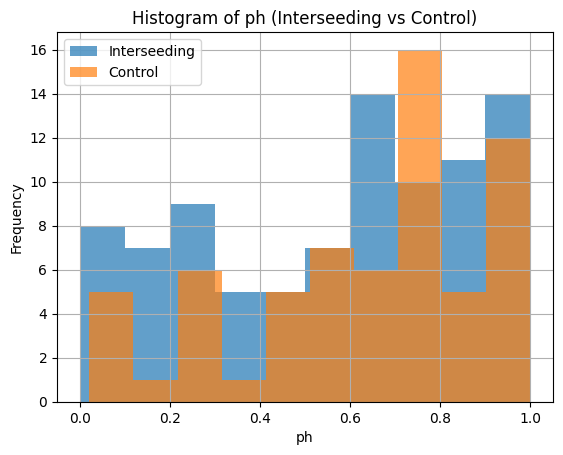



Here in ==== p ====
              count       mean        std    min       25%   50%      75%  \
treatment                                                                   
control        64.0  45.446156  53.167407  6.000  14.87375  27.0  63.0000   
interseeding   90.0  46.164556  41.325929  3.554  17.15675  31.5  67.7005   

                  max  
treatment              
control       322.000  
interseeding  206.184  
Mann-Whitney U test:
U-statistic: 3087.0
P-value: 0.44895943602439015
The p-value is greater than or equal to the significance level. Fail to reject the null hypothesis.
Welch's t-test (equal variances):
T-statistic: 0.09040636582445076
P-value: 0.9281231161536787
The p-value is greater than or equal to the significance level. Fail to reject the null hypothesis.


<ipython-input-291-2fcb37616f66>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



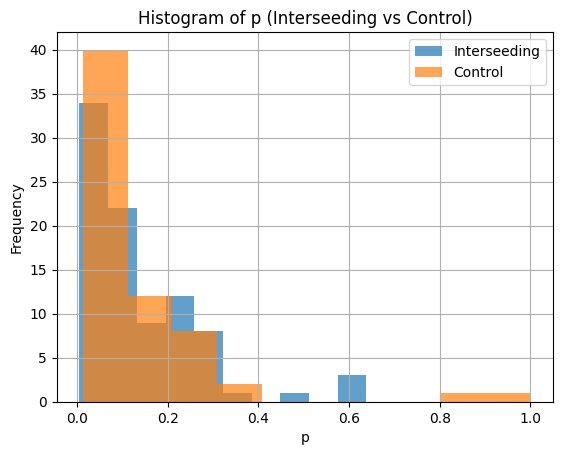



Here in ==== k ====
              count        mean        std   min    25%    50%      75%    max
treatment                                                                     
control        64.0  135.418750  79.460898  46.2  93.45  109.0  159.500  564.6
interseeding   90.0  127.774444  87.025428  23.4  76.40  101.8  140.375  575.4
Mann-Whitney U test:
U-statistic: 2512.0
P-value: 0.17785854690286884
The p-value is greater than or equal to the significance level. Fail to reject the null hypothesis.
Welch's t-test (equal variances):
T-statistic: -0.5653831636296949
P-value: 0.5727005532385132
The p-value is greater than or equal to the significance level. Fail to reject the null hypothesis.


<ipython-input-291-2fcb37616f66>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



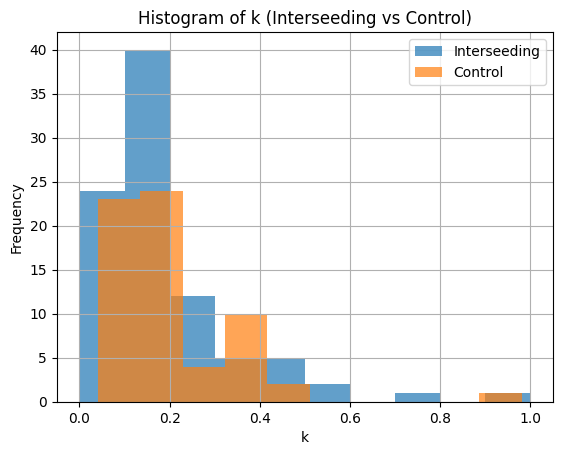



Here in ==== Organic Matter (%) ====
              count      mean       std       min    25%       50%      75%  \
treatment                                                                     
control        64.0  2.781336  0.974988  1.148062  2.175  2.694377  3.52500   
interseeding   90.0  2.710817  1.022838  1.098281  2.000  2.656646  3.45502   

              max  
treatment          
control       5.3  
interseeding  5.6  
Mann-Whitney U test:
U-statistic: 2760.0
P-value: 0.6612344822569622
The p-value is greater than or equal to the significance level. Fail to reject the null hypothesis.
Welch's t-test (equal variances):
T-statistic: -0.43338071923051125
P-value: 0.6654068820639628
The p-value is greater than or equal to the significance level. Fail to reject the null hypothesis.


<ipython-input-291-2fcb37616f66>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



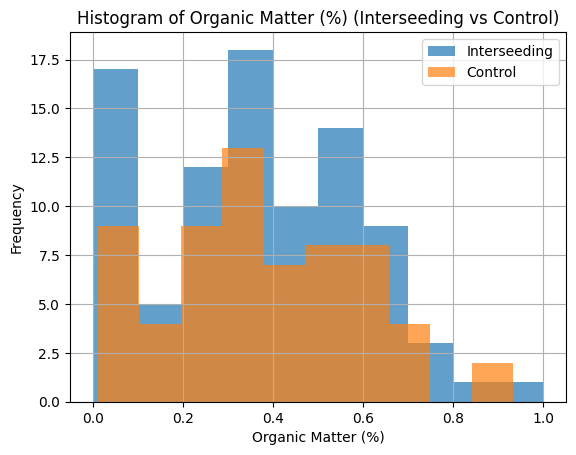

['ph_normalized',
 'p_normalized',
 'k_normalized',
 'Organic Matter (%)_normalized']

In [291]:
'''
Null Hypothesis (H0): There is no significant difference in the median pH values between the "control" and "interseeding" treatments.
'''

health_soil = df_soildta_f
cols=[]

for c in health_c:
  if 'sikora' in c:
    pass
  else:
    print(f"Here in ==== {c} ====")
    from sklearn.preprocessing import StandardScaler



    print(health_soil.groupby('treatment')[c].describe())

    health_soil[c+'_normalized'] = (health_soil[c] - health_soil[c].min()) / (health_soil[c].max() - health_soil[c].min())
    cols.append(c+'_normalized')

    interseeding = health_soil[health_soil['treatment']=='interseeding'][c+'_normalized'].values
    control = health_soil[health_soil['treatment']=='control'][c+'_normalized'].values
    nonparam_test(interseeding, control)

    nonparam_test2(interseeding, control)

    # Assuming 'health_soil' is your DataFrame and 'c' is the chosen variable
    plot_histograms(interseeding=interseeding,
                control=control,
                variable_name=c)
    print('\n')
#health_soil['sikora_normalized'] = (df['sikora'] - df['sikora'].min()) / (df['sikora'].max() - df['sikora'].min())

cols

In [295]:
# Define weights for each variable
weights = {
    'ph_normalized': .25,  # Adjust weights based on importance
    'p_normalized': .25,
    #'k_normalized': 0.25,
    'Organic Matter (%)_normalized': .5
}

# Calculate composite score
df_soildta1['forage_quality_score'] = (df_soildta1['ph'] * weights['ph_normalized']) + (df_soildta1['p'] * weights['p_normalized'])+ (df_soildta1['Organic Matter (%)'] * weights['Organic Matter (%)_normalized'])


In [296]:
df_soildta1.groupby('treatment')['forage_quality_score'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
control,64.0,0.232230,0.696277,-0.920794,-0.325936,0.223476,0.706728,2.083662
interseeding,88.0,0.159493,0.699854,-0.964306,-0.483277,0.155197,0.645518,1.670275


In [173]:
# Count missing values in the 'grain_yield' column
for c in forage_q:
  missing_count = df_soildta[c].isnull().sum()

  print(f"Number of missing values in {c} column:", missing_count,' --- pct', 100*np.round(missing_count/259,2))

Number of missing values in no3-n column: 152  --- pct 59.0
Number of missing values in nh4-n column: 152  --- pct 59.0
Number of missing values in tn column: 95  --- pct 37.0
Number of missing values in tc column: 95  --- pct 37.0
Number of missing values in POX-C (ppm) column: 107  --- pct 41.0


In [161]:
grouped = merged.groupby('treatment_x')

# Calculate summary statistics for relevant columns
summary_stats = grouped.agg({
    'ph': ['mean', 'std'],  # Example columns, add more as needed
    'sikora': ['mean', 'std'],
    'p': ['mean', 'std'], 'k': ['mean', 'std'], 'Organic Matter (%)': ['mean', 'std'], 'no3-n': ['mean', 'std'],
       'nh4-n': ['mean', 'std'], 'tn': ['mean', 'std'], 'tc': ['mean', 'std'], 'POX-C (ppm)': ['mean', 'std']
    # Add more columns as needed
})

# Display summary statistics
print(summary_stats)

                    ph              sikora                    p             \
                  mean       std      mean       std       mean        std   
treatment_x                                                                  
control       6.959623  0.646306  6.945833  0.146626  48.424245  66.064252   
interseeding  6.793118  0.715387  6.894286  0.155574  56.337484  66.102183   

                       k             Organic Matter (%)                no3-n  \
                    mean         std               mean       std       mean   
treatment_x                                                                    
control       142.005660  114.936816           2.985715  0.938144  15.761905   
interseeding  154.294624  139.910190           2.962116  0.970191  17.310000   

                            nh4-n                  tn                  tc  \
                    std      mean       std      mean       std      mean   
treatment_x                                           

In [162]:
df= merged
df['ph_normalized'] = (df['ph'] - df['ph'].min()) / (df['ph'].max() - df['ph'].min())
df['sikora_normalized'] = (df['sikora'] - df['sikora'].min()) / (df['sikora'].max() - df['sikora'].min())

# Define weights for each variable
weights = {
    'ph_normalized': 0.5,  # Adjust weights based on importance
    'sikora_normalized': 0.5
}

# Calculate composite score
df['forage_quality_score'] = (df['ph_normalized'] * weights['ph_normalized']) + (df['sikora_normalized'] * weights['sikora_normalized'])

# D

In [164]:
df.groupby('treatment_x')['forage_quality_score'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment_x,,,,,,,,
control,12.0,0.486745,0.145127,0.188736,0.401511,0.473077,0.614835,0.705769
interseeding,28.0,0.435960,0.141680,0.116209,0.368613,0.446703,0.548764,0.610165


In [165]:
df.groupby('treatment_x')['ph_normalized'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment_x,,,,,,,,
control,53.0,0.715239,0.248579,0.134615,0.650000,0.807692,0.923077,1.0
interseeding,93.0,0.651199,0.275149,0.000000,0.453846,0.692308,0.884615,1.0


In [166]:
df.groupby('treatment_x')['sikora_normalized'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment_x,,,,,,,,
control,12.0,0.665476,0.209466,0.242857,0.600,0.621429,0.803571,1.000000
interseeding,28.0,0.591837,0.222248,0.000000,0.575,0.628571,0.742857,0.885714
